In [1]:
# IMPORTS 
import pandas as pd
import numpy as np
import shutil
import os
import time
import subprocess
import sys
import datetime
import matplotlib.pyplot as plt
from os.path import exists as file_exists
import matplotlib.dates as mdates
import math

# Constants
labelfont = {'fontname':'Calibri'}
ticksize = 10
labelsize = 12
titlesize = 18

In [2]:
# FILE PATHS
data_file_path = r"C:\Users\govertsen.k\Northeastern University\Community Resilience in Extreme Temperatures - Data\Outputs"
data_file_path = data_file_path.replace(os.sep, '/')

In [3]:
# CONSTANTS
study = ["baseline","outage"]

# Identify all the models
models = [os.path.splitext(filename)[0] for filename in os.listdir(data_file_path + '/baseline/')]

# Outage 
otg_date = "July 24"
otg_hour = "12"
otg_lengths = os.listdir(data_file_path+ "/outage/")
otg_lengths.sort(key=int)

In [4]:
otg_lengths

['2', '4', '6', '8', '10', '12', '24', '48']

In [5]:
otg_start =  datetime.datetime.strptime(otg_date + " " + str(otg_hour) + ':00:00','%B %d %H:%M:%S')
otg_start = pd.to_datetime(otg_start)

In [ ]:
otg_end = pd.

In [6]:
# Load Everything
# Metadata
metadata = pd.read_csv(data_file_path + "/Models_Worcester_Metadata.csv")
# add leading 0s to ID
metadata['bldg_id'] = metadata['bldg_id'].values.astype('str')
metadata['bldg_id'] = metadata['bldg_id'].str.zfill(7)

# Baseline
baseline_temperature = pd.read_csv(data_file_path + "/summary/baseline_temperature.csv")
baseline_temperature['Date/Time'] = pd.to_datetime(baseline_temperature['Date/Time'])
baseline_electricity = pd.read_csv(data_file_path + "/summary/baseline_electricity.csv")
baseline_electricity['Date/Time'] = pd.to_datetime(baseline_electricity['Date/Time'])
baseline_gas = pd.read_csv(data_file_path + "/summary/baseline_gas.csv")
baseline_gas['Date/Time'] = pd.to_datetime(baseline_gas['Date/Time'])

# Outdoor
outdoor = pd.read_csv(data_file_path + "/summary/outdoor.csv")
outdoor['Date/Time'] = pd.to_datetime(outdoor['Date/Time'])

Text(0.5, 1.0, 'Outdoor Temperature')

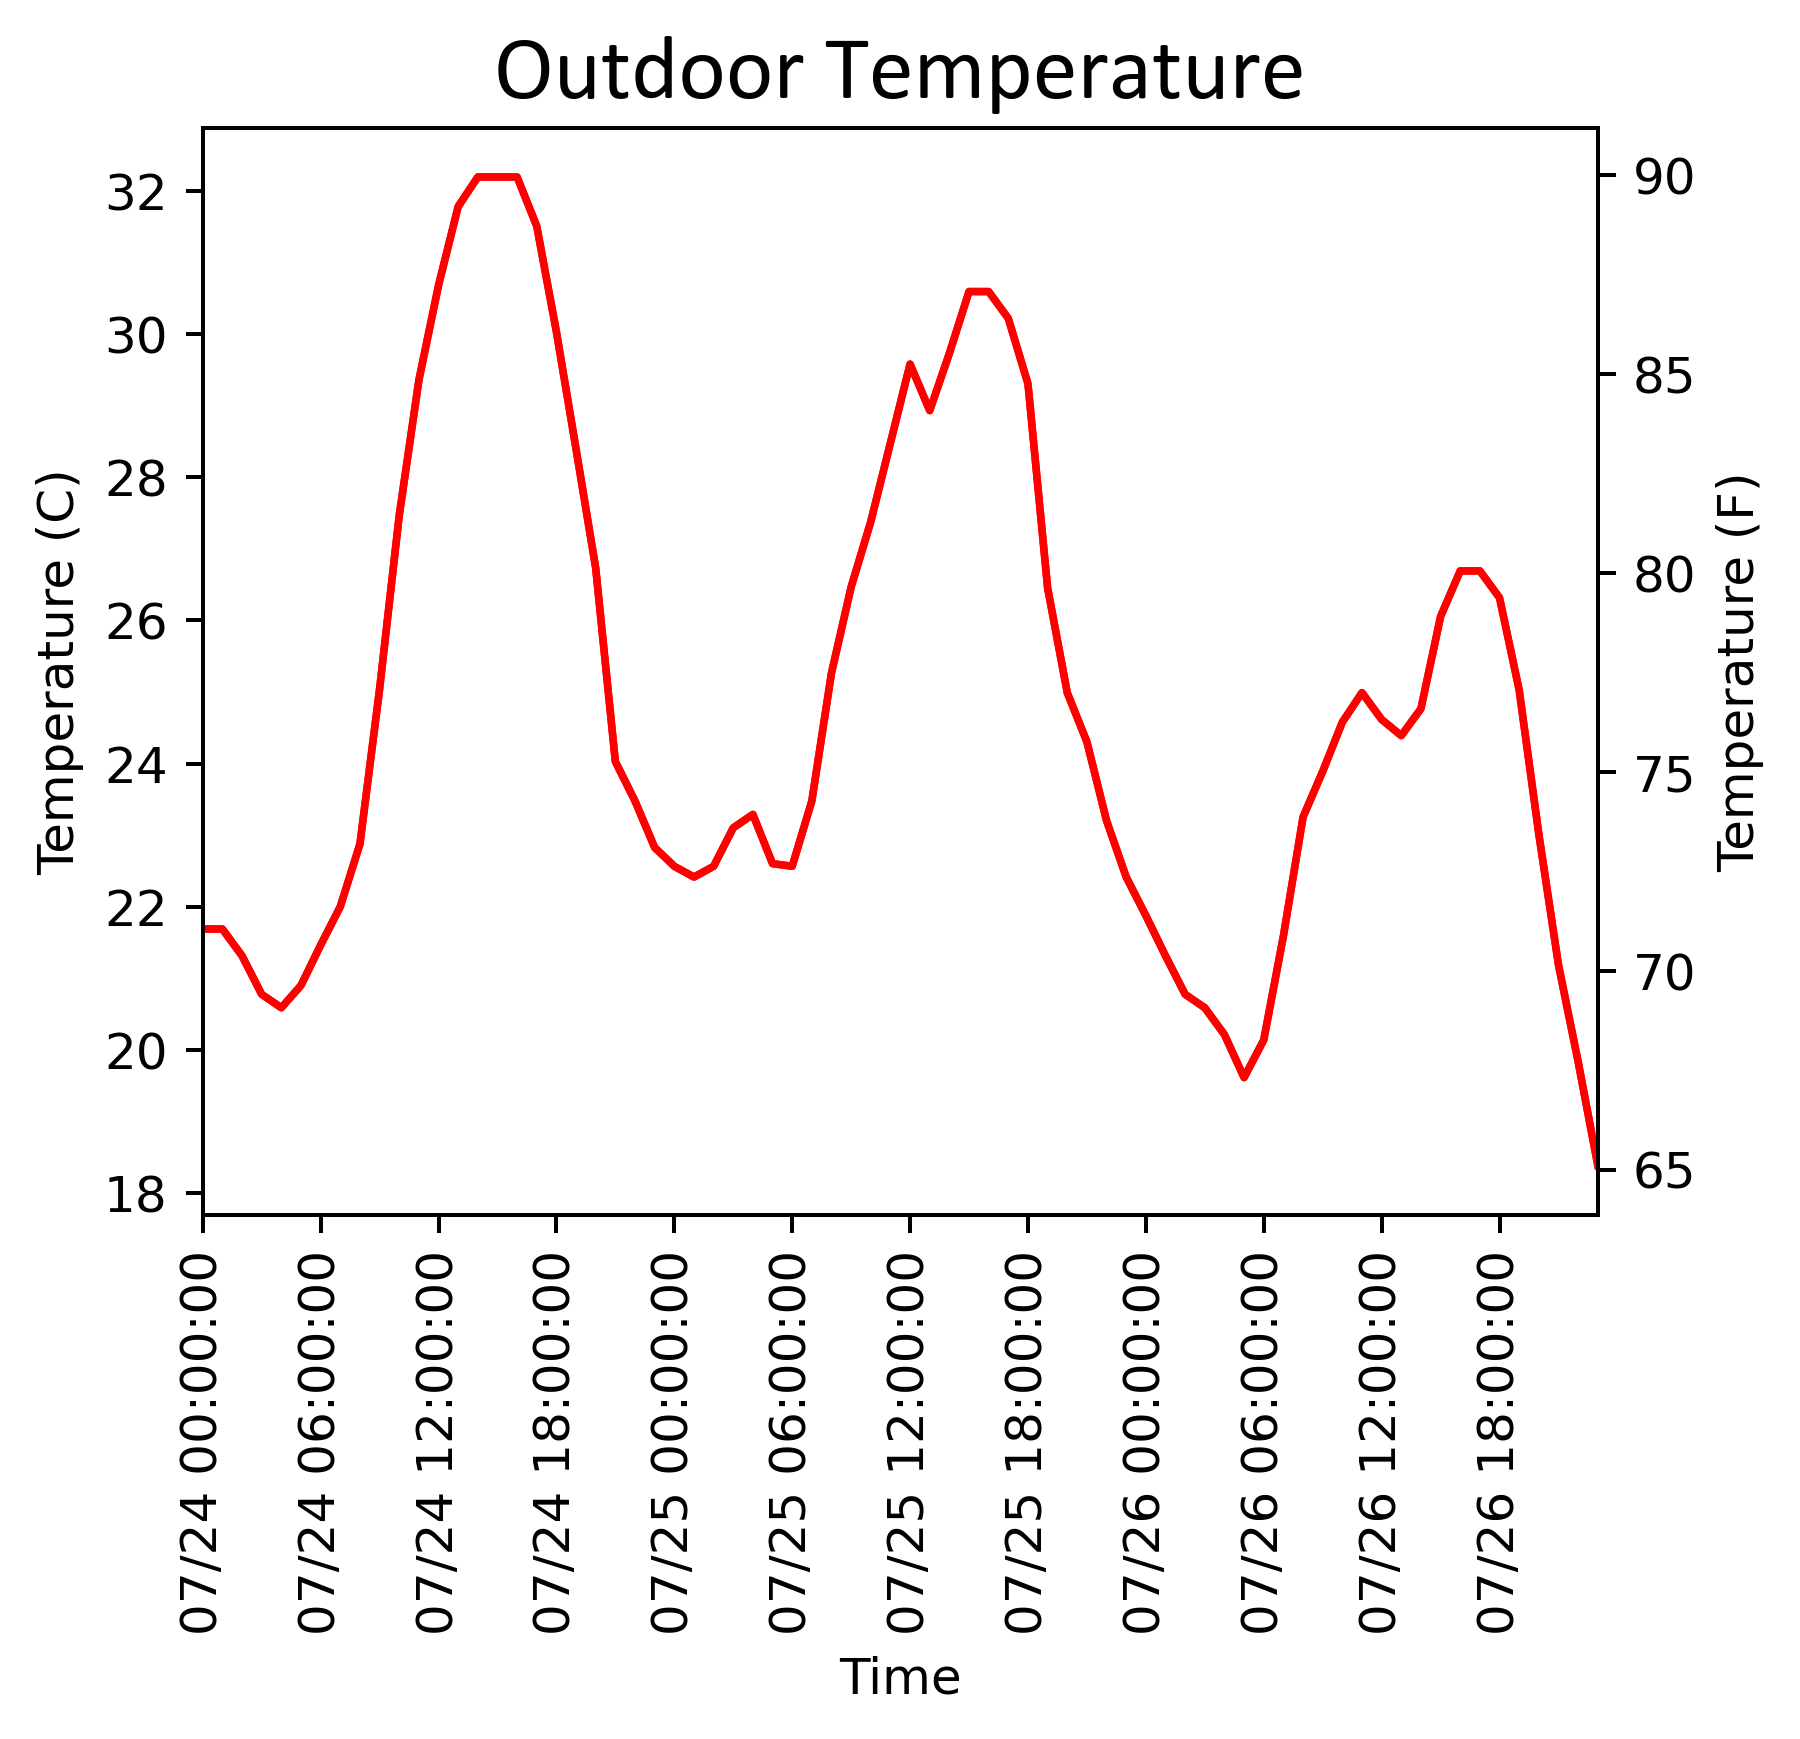

In [7]:
fig1, ax1 = plt.subplots(figsize=(5,4),dpi=360)
ax1.plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],label='Outdoor Temperature',color='r')
x_ticks = pd.date_range(start =min(outdoor['Date/Time']), end =max(outdoor['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (C)')
ax1b = ax1.twinx()
ax1b.plot(outdoor['Date/Time'],32+(9/5)*outdoor['Outdoor Temp'],label='Outdoor Temperature',color='r')
ax1b.set_ylabel('Temperature (F)')
ax1.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax1.set_xlim(min(outdoor['Date/Time']),max(outdoor['Date/Time']))
#ax1.legend()
ax1.set_title('Outdoor Temperature',fontsize=titlesize,**labelfont)

Text(0.5, 1.0, 'Outdoor Temperature With Power Outage Lengths')

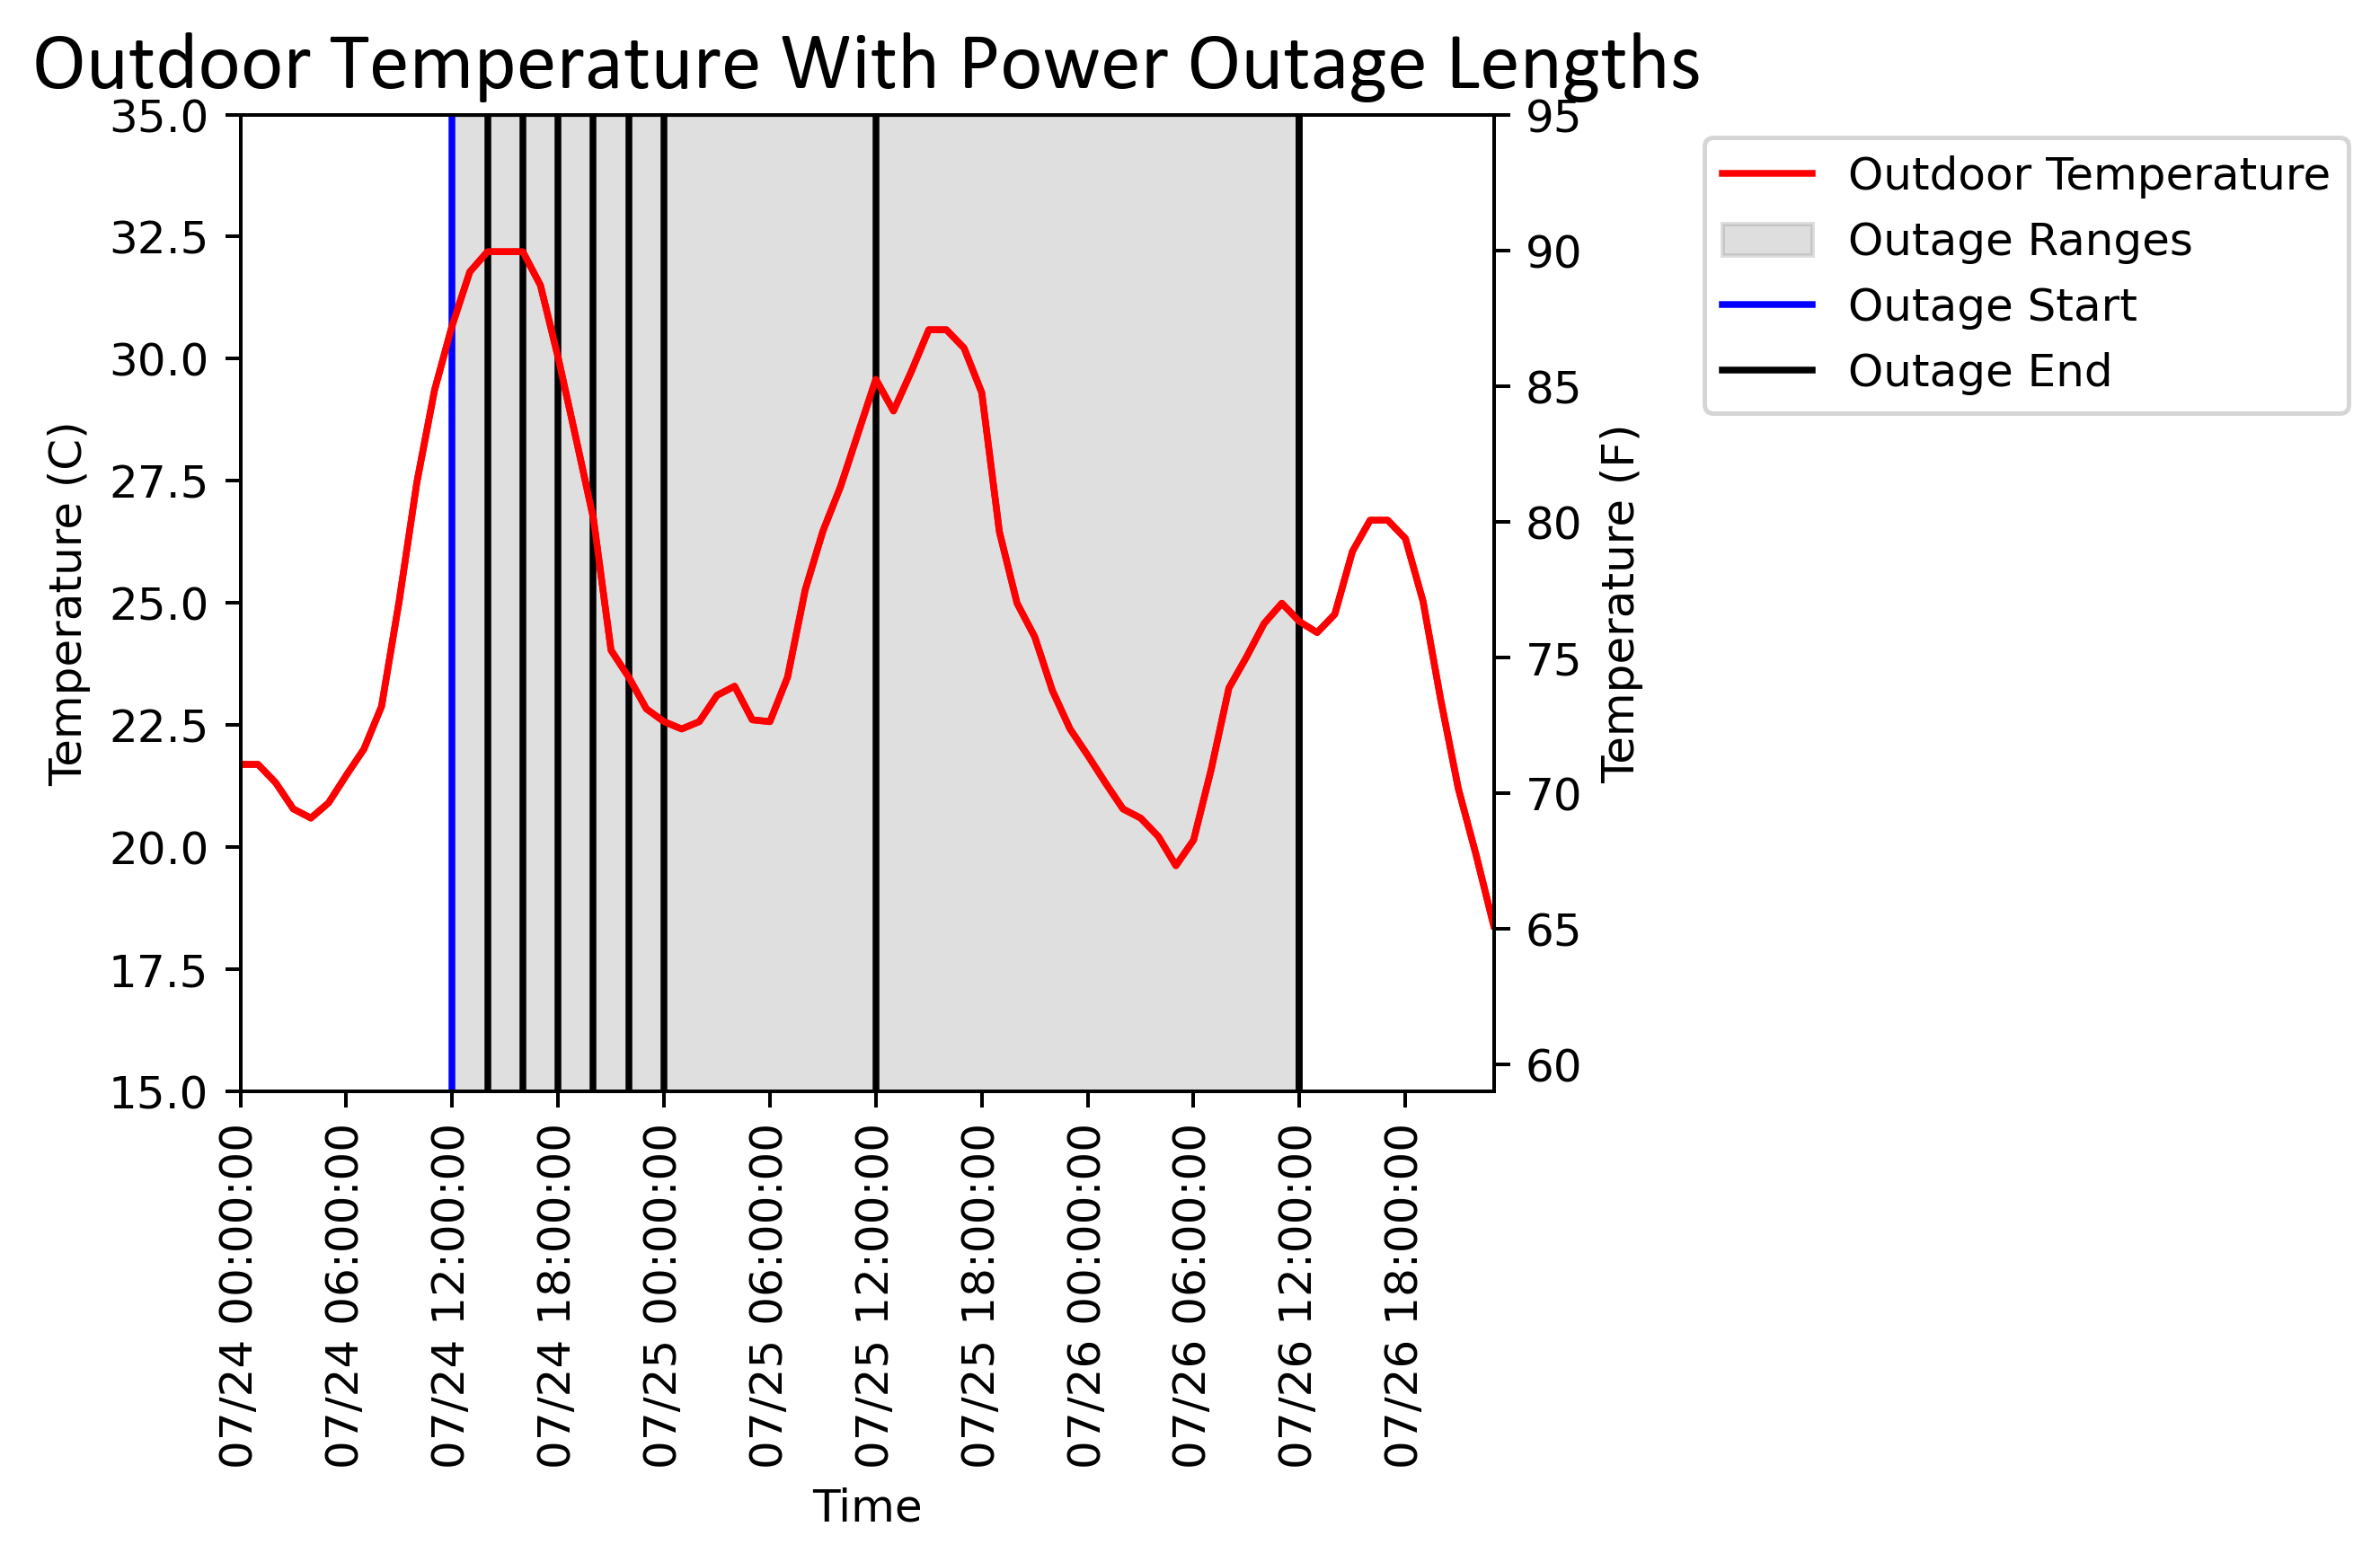

In [58]:
fig1, ax1 = plt.subplots(figsize=(5,4),dpi=360)
y_min = 15
y_max = 35
ax1.plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],label='Outdoor Temperature',color='r')
x_ticks = pd.date_range(start =min(outdoor['Date/Time']), end =max(outdoor['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (C)')
ax1b = ax1.twinx()
ax1b.plot(outdoor['Date/Time'],32+(9/5)*outdoor['Outdoor Temp'],label='Outdoor Temperature',color='r')
ax1b.set_ylabel('Temperature (F)')
ax1.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax1.set_xlim(min(outdoor['Date/Time']),max(outdoor['Date/Time']))
ax1.set_ylim([y_min,y_max])
ax1b.set_ylim([32+(9/5)*y_min,32+(9/5)*y_max])
ax1.fill_between([otg_start,otg_start + pd.Timedelta(int(otg_lengths[-1]),"H")],[y_max,y_max],alpha=.25,color='grey',label="Outage Ranges")
for each_outage in otg_lengths:
    otg_end = otg_start + pd.Timedelta(int(each_outage),"H")
    ax1.axvline(x = otg_end, color = 'k')
ax1.axvline(x = otg_start, color = 'b', label = 'Outage Start')
ax1.axvline(x = otg_end, color = 'k', label = 'Outage End')
ax1.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left')
ax1.set_title('Outdoor Temperature With Power Outage Lengths',fontsize=titlesize,**labelfont)

In [8]:
# NExt Steps:
# Swimmer plot of categorial data in python 
# X: housing type
# Y: Vingage
# Compare the swim lanes of the EULP dataset and the tax parcel data set 


Text(0.5, 1.0, 'Baseline Indoor Temperatures')

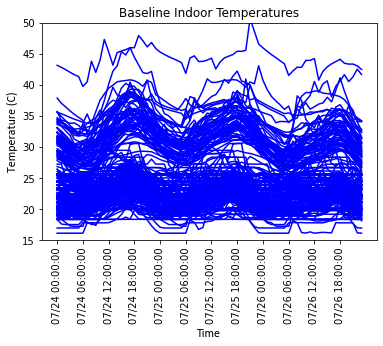

In [9]:
for each_model in models:
    plt.plot(baseline_temperature['Date/Time'],baseline_temperature[each_model], color = 'b')
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
plt.xticks(x_ticks,x_tick_labels,rotation=90)
plt.ylim((15,50))
plt.xlabel('Time',fontsize=labelsize,**labelfont)
plt.ylabel('Temperature (C)',fontsize=labelsize,**labelfont)
plt.title('Baseline Indoor Temperatures')

Text(0.5, 1.0, 'Baseline Indoor Temperatures')

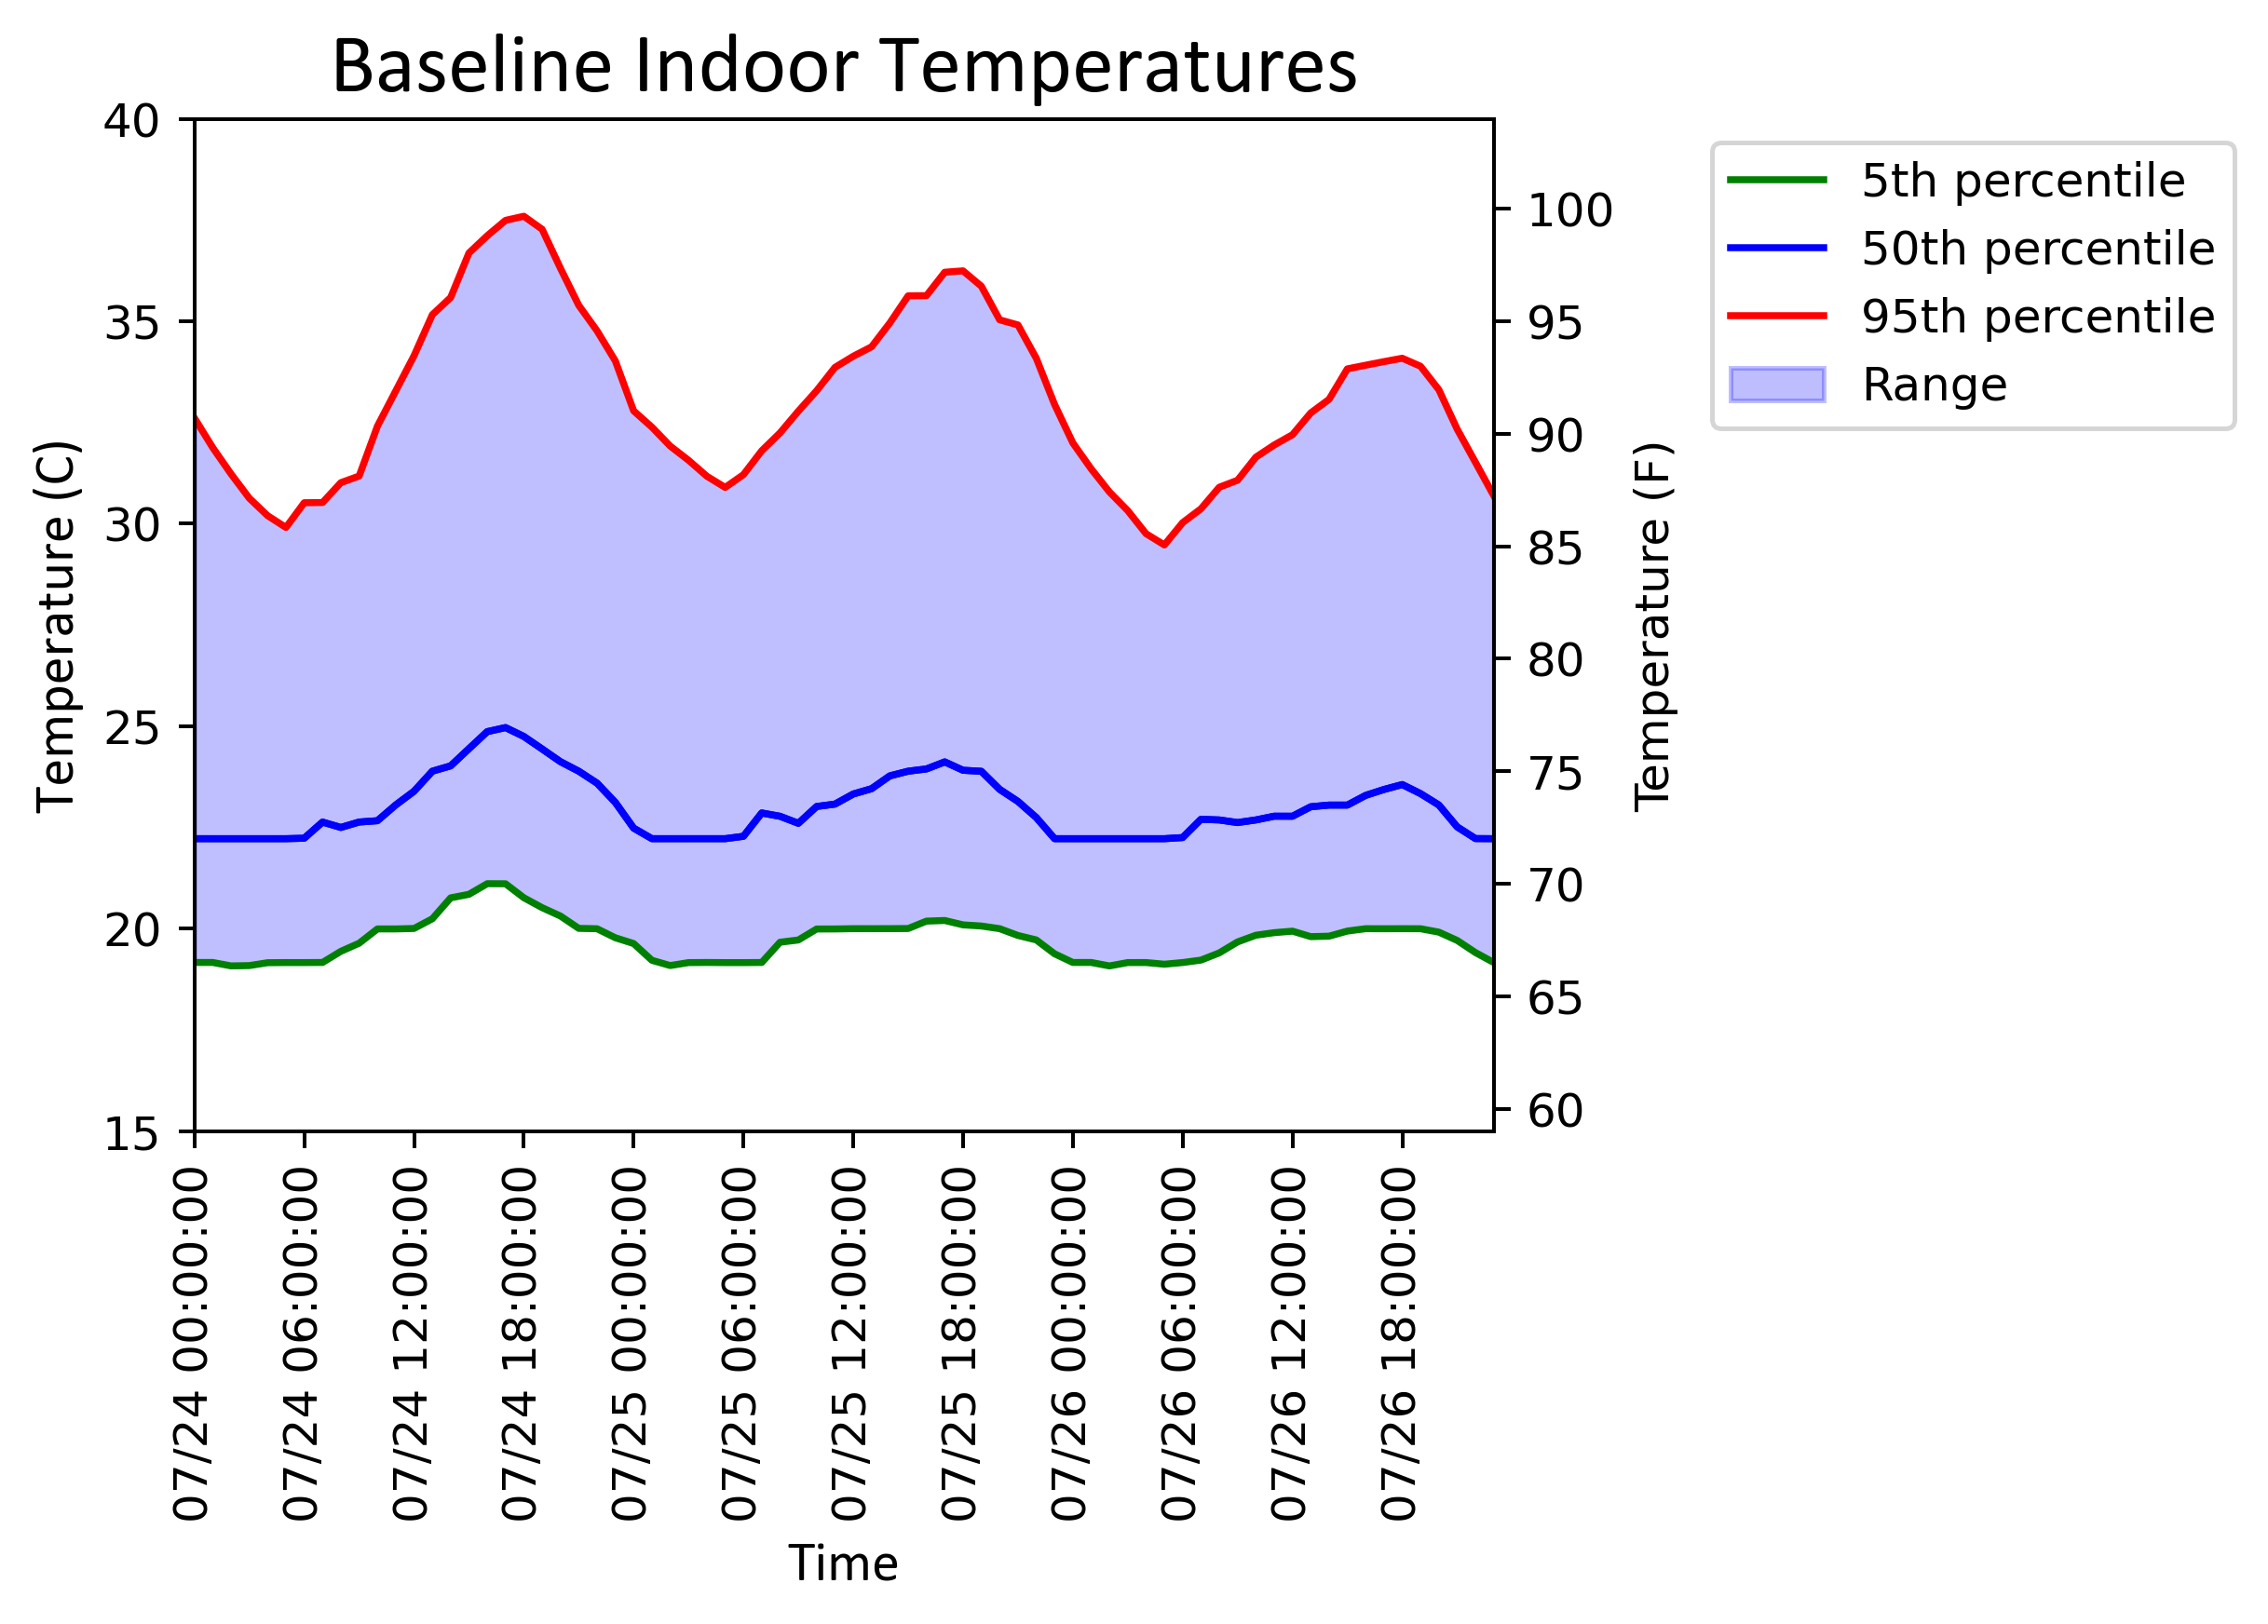

In [10]:
baseline_summary = pd.DataFrame()
baseline_summary['Date/Time'] = baseline_temperature['Date/Time']
baseline_summary['T - 5%'] = baseline_temperature.quantile(q=.05,axis=1)
baseline_summary['T - 50%'] = baseline_temperature.quantile(q=.5,axis=1)
baseline_summary['T - 95%'] = baseline_temperature.quantile(q=.95,axis=1)
y_min = 5*math.floor(baseline_summary['T - 5%'].min()/5)
y_max = 5*math.ceil(baseline_summary['T - 95%'].max()/5)
f2, ax2 = plt.subplots(figsize=(5,4),dpi=360)
ax2.plot(baseline_summary['Date/Time'],baseline_summary['T - 5%'],color='g',label="5th percentile")
ax2.plot(baseline_summary['Date/Time'],baseline_summary['T - 50%'],color = 'b',label="50th percentile")
ax2.plot(baseline_summary['Date/Time'],baseline_summary['T - 95%'],color='r',label="95th percentile")
ax2.fill_between(baseline_summary['Date/Time'], baseline_summary['T - 5%'], baseline_summary['T - 95%'],alpha=.25,color='b',label="Range")
ax2b = ax2.twinx()
ax2b.plot(baseline_summary['Date/Time'],32+(9/5)*baseline_summary['T - 50%'],color = 'b',label="50th percentile")
ax2b.set_ylabel('Temperature (F)')
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax2.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax2.set_xlim(min(baseline_summary['Date/Time']),max(baseline_summary['Date/Time']))
ax2.set_ylim((y_min,y_max))
ax2b.set_ylim((32+(9/5)*y_min,32+(9/5)*y_max))
ax2.set_xlabel('Time',fontsize=labelsize,**labelfont)
ax2.set_ylabel('Temperature (C)',fontsize=labelsize,**labelfont)
ax2.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left')
ax2.set_title('Baseline Indoor Temperatures',fontsize=titlesize,**labelfont)

Text(0.5, 1.0, 'Baseline Indoor Temperatures')

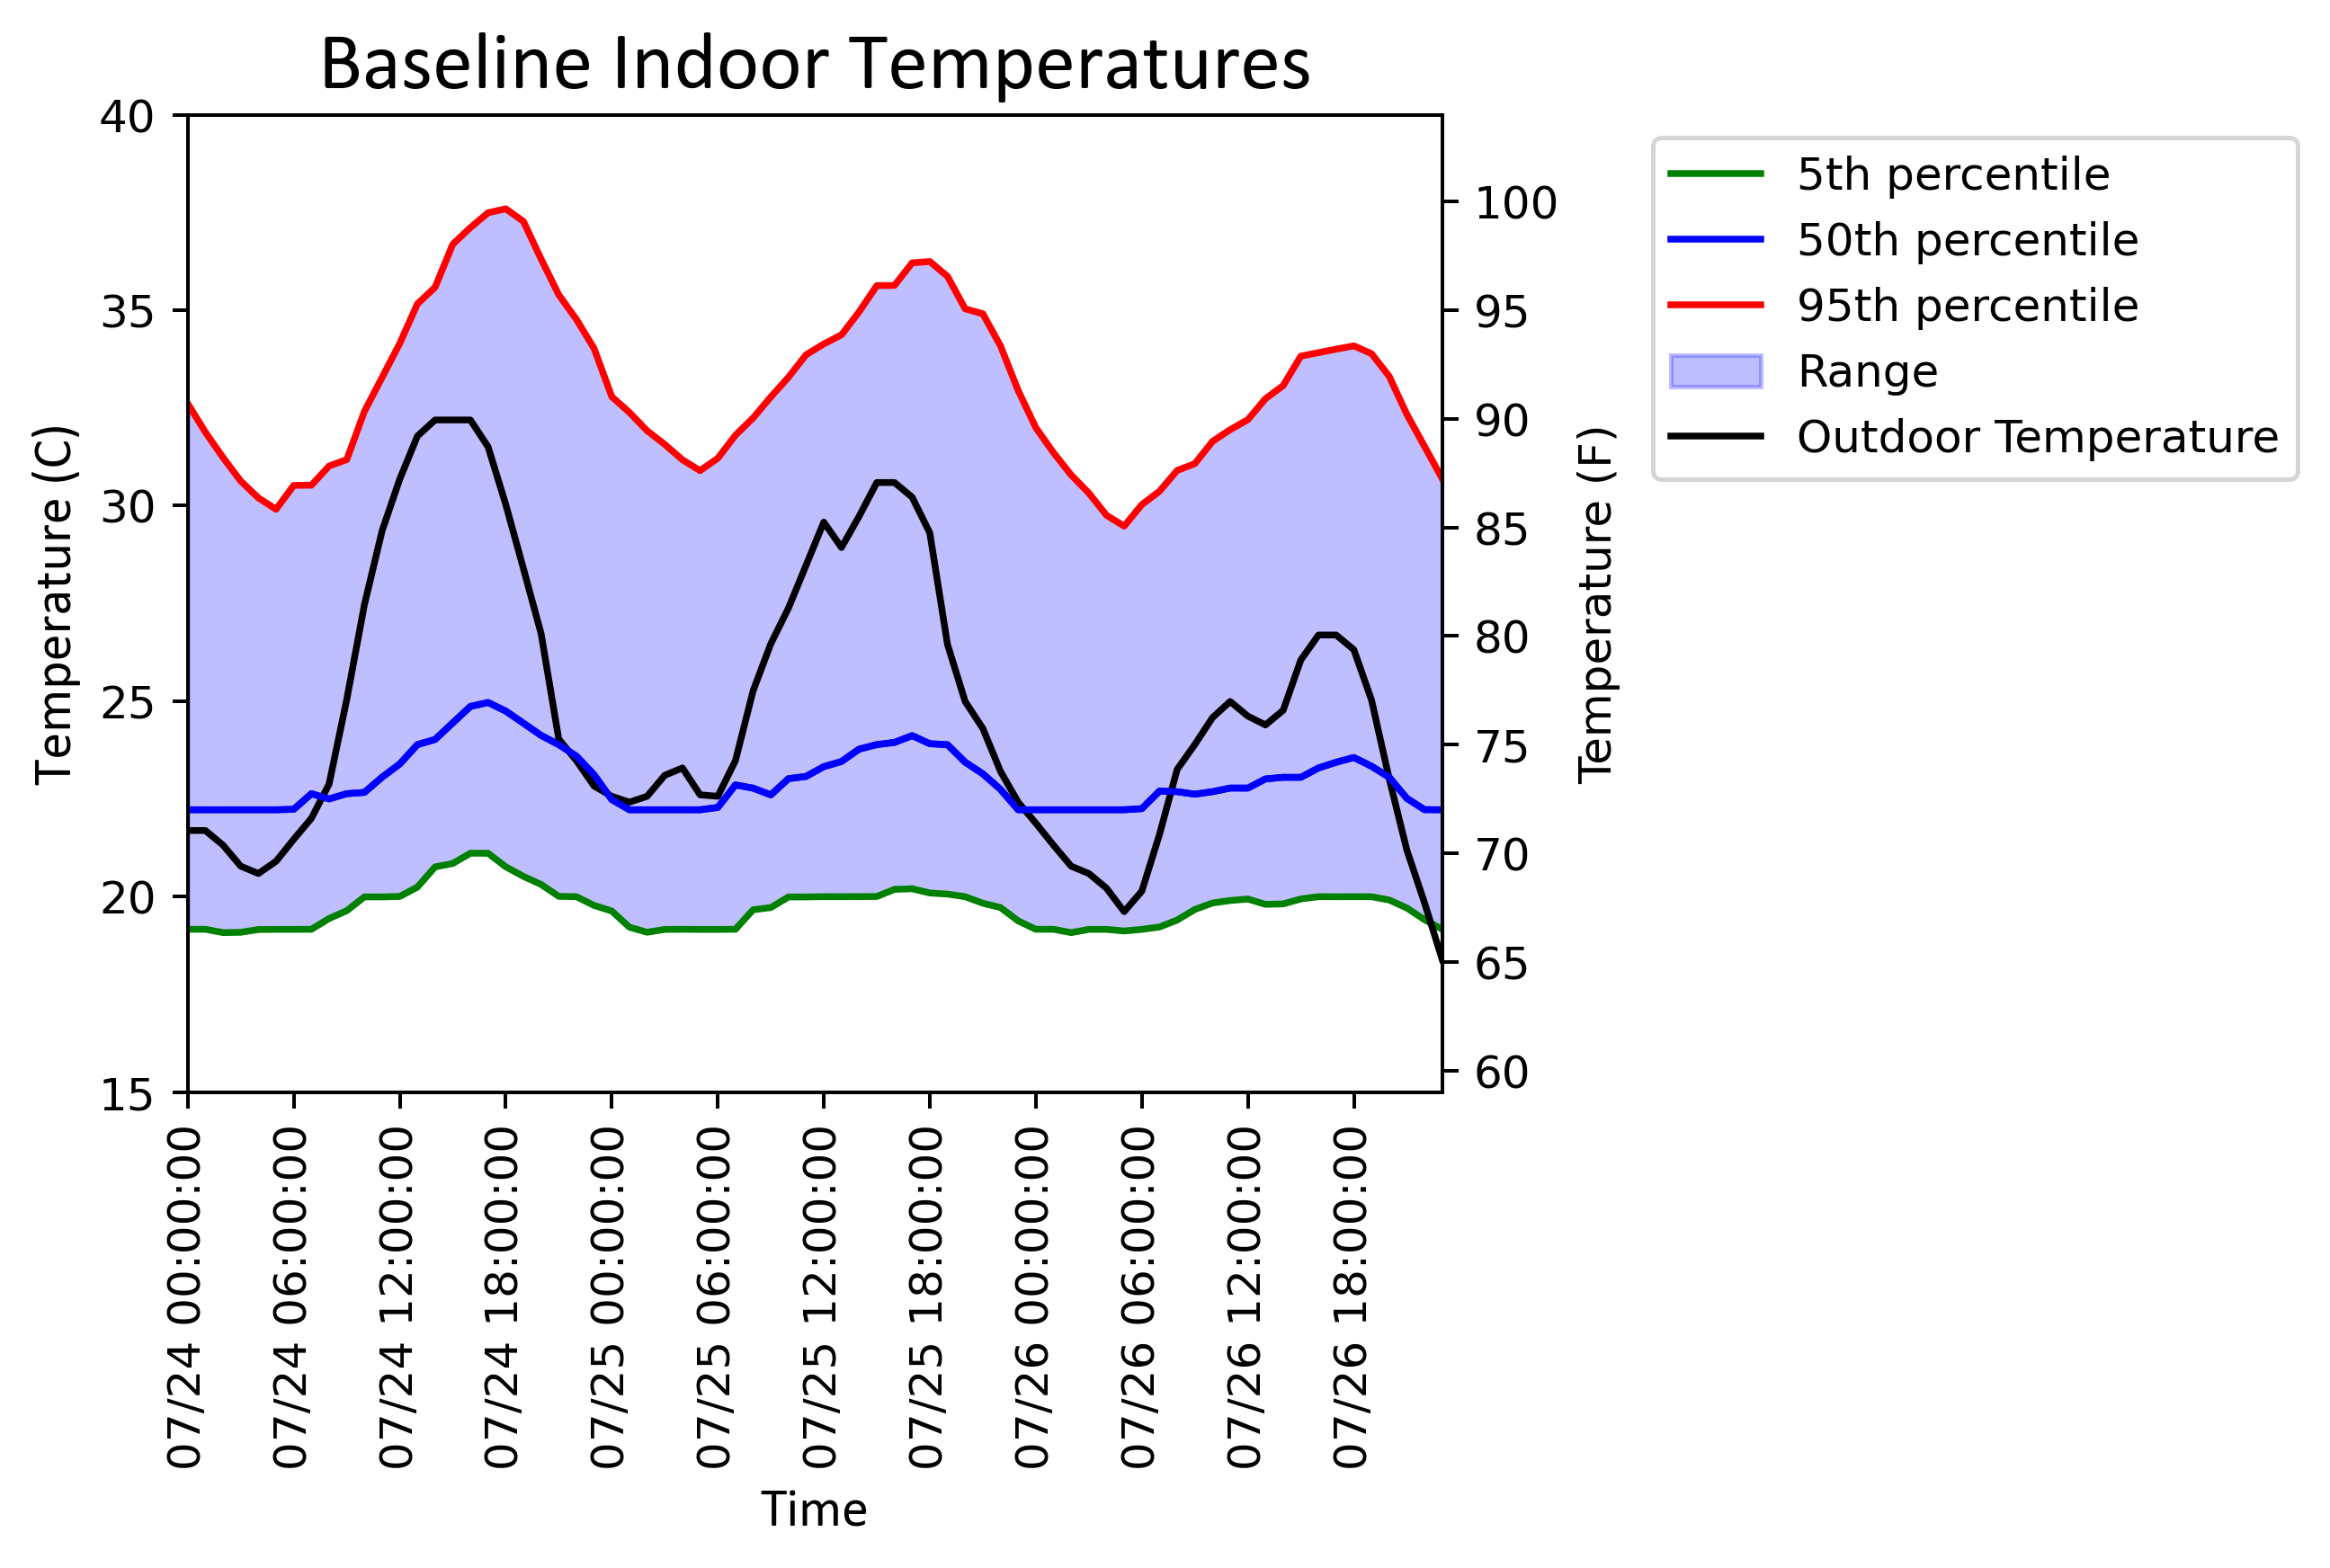

In [13]:
# baseline_summary = pd.DataFrame()
# baseline_summary['Date/Time'] = baseline_temperature['Date/Time']
# baseline_summary['T - 5%'] = baseline_temperature.quantile(q=.05,axis=1)
# baseline_summary['T - 50%'] = baseline_temperature.quantile(q=.5,axis=1)
# baseline_summary['T - 95%'] = baseline_temperature.quantile(q=.95,axis=1)
# y_min = 5*math.floor(baseline_summary['T - 5%'].min()/5)
# y_max = 5*math.ceil(baseline_summary['T - 95%'].max()/5)
f3, ax3 = plt.subplots(figsize=(5,4),dpi=360)
ax3.plot(baseline_summary['Date/Time'],baseline_summary['T - 5%'],color='g',label="5th percentile")
ax3.plot(baseline_summary['Date/Time'],baseline_summary['T - 50%'],color = 'b',label="50th percentile")
ax3.plot(baseline_summary['Date/Time'],baseline_summary['T - 95%'],color='r',label="95th percentile")
ax3.fill_between(baseline_summary['Date/Time'], baseline_summary['T - 5%'], baseline_summary['T - 95%'],alpha=.25,color='b',label="Range")
ax3.plot(outdoor['Date/Time'],outdoor['Outdoor Temp'],color='k',label='Outdoor Temperature')
ax3b = ax3.twinx()
ax3b.plot(baseline_summary['Date/Time'],32+(9/5)*baseline_summary['T - 50%'],color = 'b',label="50th percentile")
ax3b.set_ylabel('Temperature (F)')
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax3.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax3.set_xlim(min(baseline_summary['Date/Time']),max(baseline_summary['Date/Time']))
ax3.set_ylim((y_min,y_max))
ax3b.set_ylim((32+(9/5)*y_min,32+(9/5)*y_max))
ax3.set_xlabel('Time',fontsize=labelsize,**labelfont)
ax3.set_ylabel('Temperature (C)',fontsize=labelsize,**labelfont)
ax3.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left')
ax3.set_title('Baseline Indoor Temperatures',fontsize=titlesize,**labelfont)

Text(0.5, 0, 'Type')

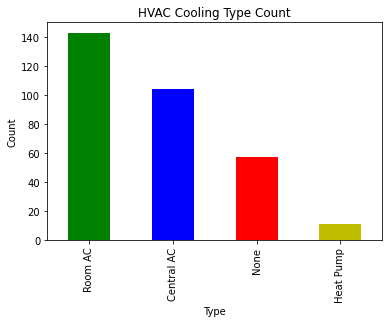

In [14]:
#if each_'Central AC', 'Room AC', 'None', 'Heat Pump'
metadata['in.hvac_cooling_type'].value_counts().plot(kind='bar', color = ['g','b','r','y'])
plt.title('HVAC Cooling Type Count')
plt.ylabel('Count')
plt.xlabel('Type')

Text(0.5, 1.0, 'Baseline Indoor Temperatures with AC Type')

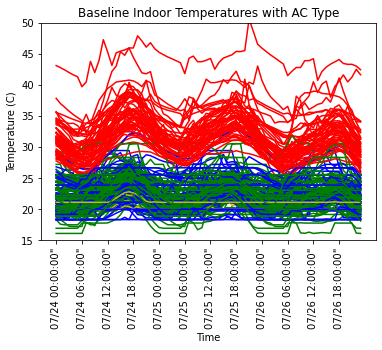

In [15]:
for each_model in models:
    hvac_type = metadata.loc[metadata['bldg_id'] == each_model[4:]]['in.hvac_cooling_type']
    if (hvac_type == 'Central AC').any():
        hvac_color = 'b'
    elif (hvac_type == 'Room AC').any():
        hvac_color = 'g'
    elif (hvac_type == 'None').any():
        hvac_color = 'r'
    else:
        hvac_color = 'y'
    plt.plot(baseline_temperature['Date/Time'],baseline_temperature[each_model], color = hvac_color)
plt.ylim((15,50))
plt.xlabel('Time')
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S"')
plt.xticks(x_ticks,x_tick_labels,rotation=90)
plt.ylabel('Temperature (C)')
plt.title('Baseline Indoor Temperatures with AC Type')
#plt.legend(handles = ["Central AC", "Room AC", "None", "Heat Pump"])

Text(0.5, 1.0, 'Baseline Indoor Temperatures by AC Type')

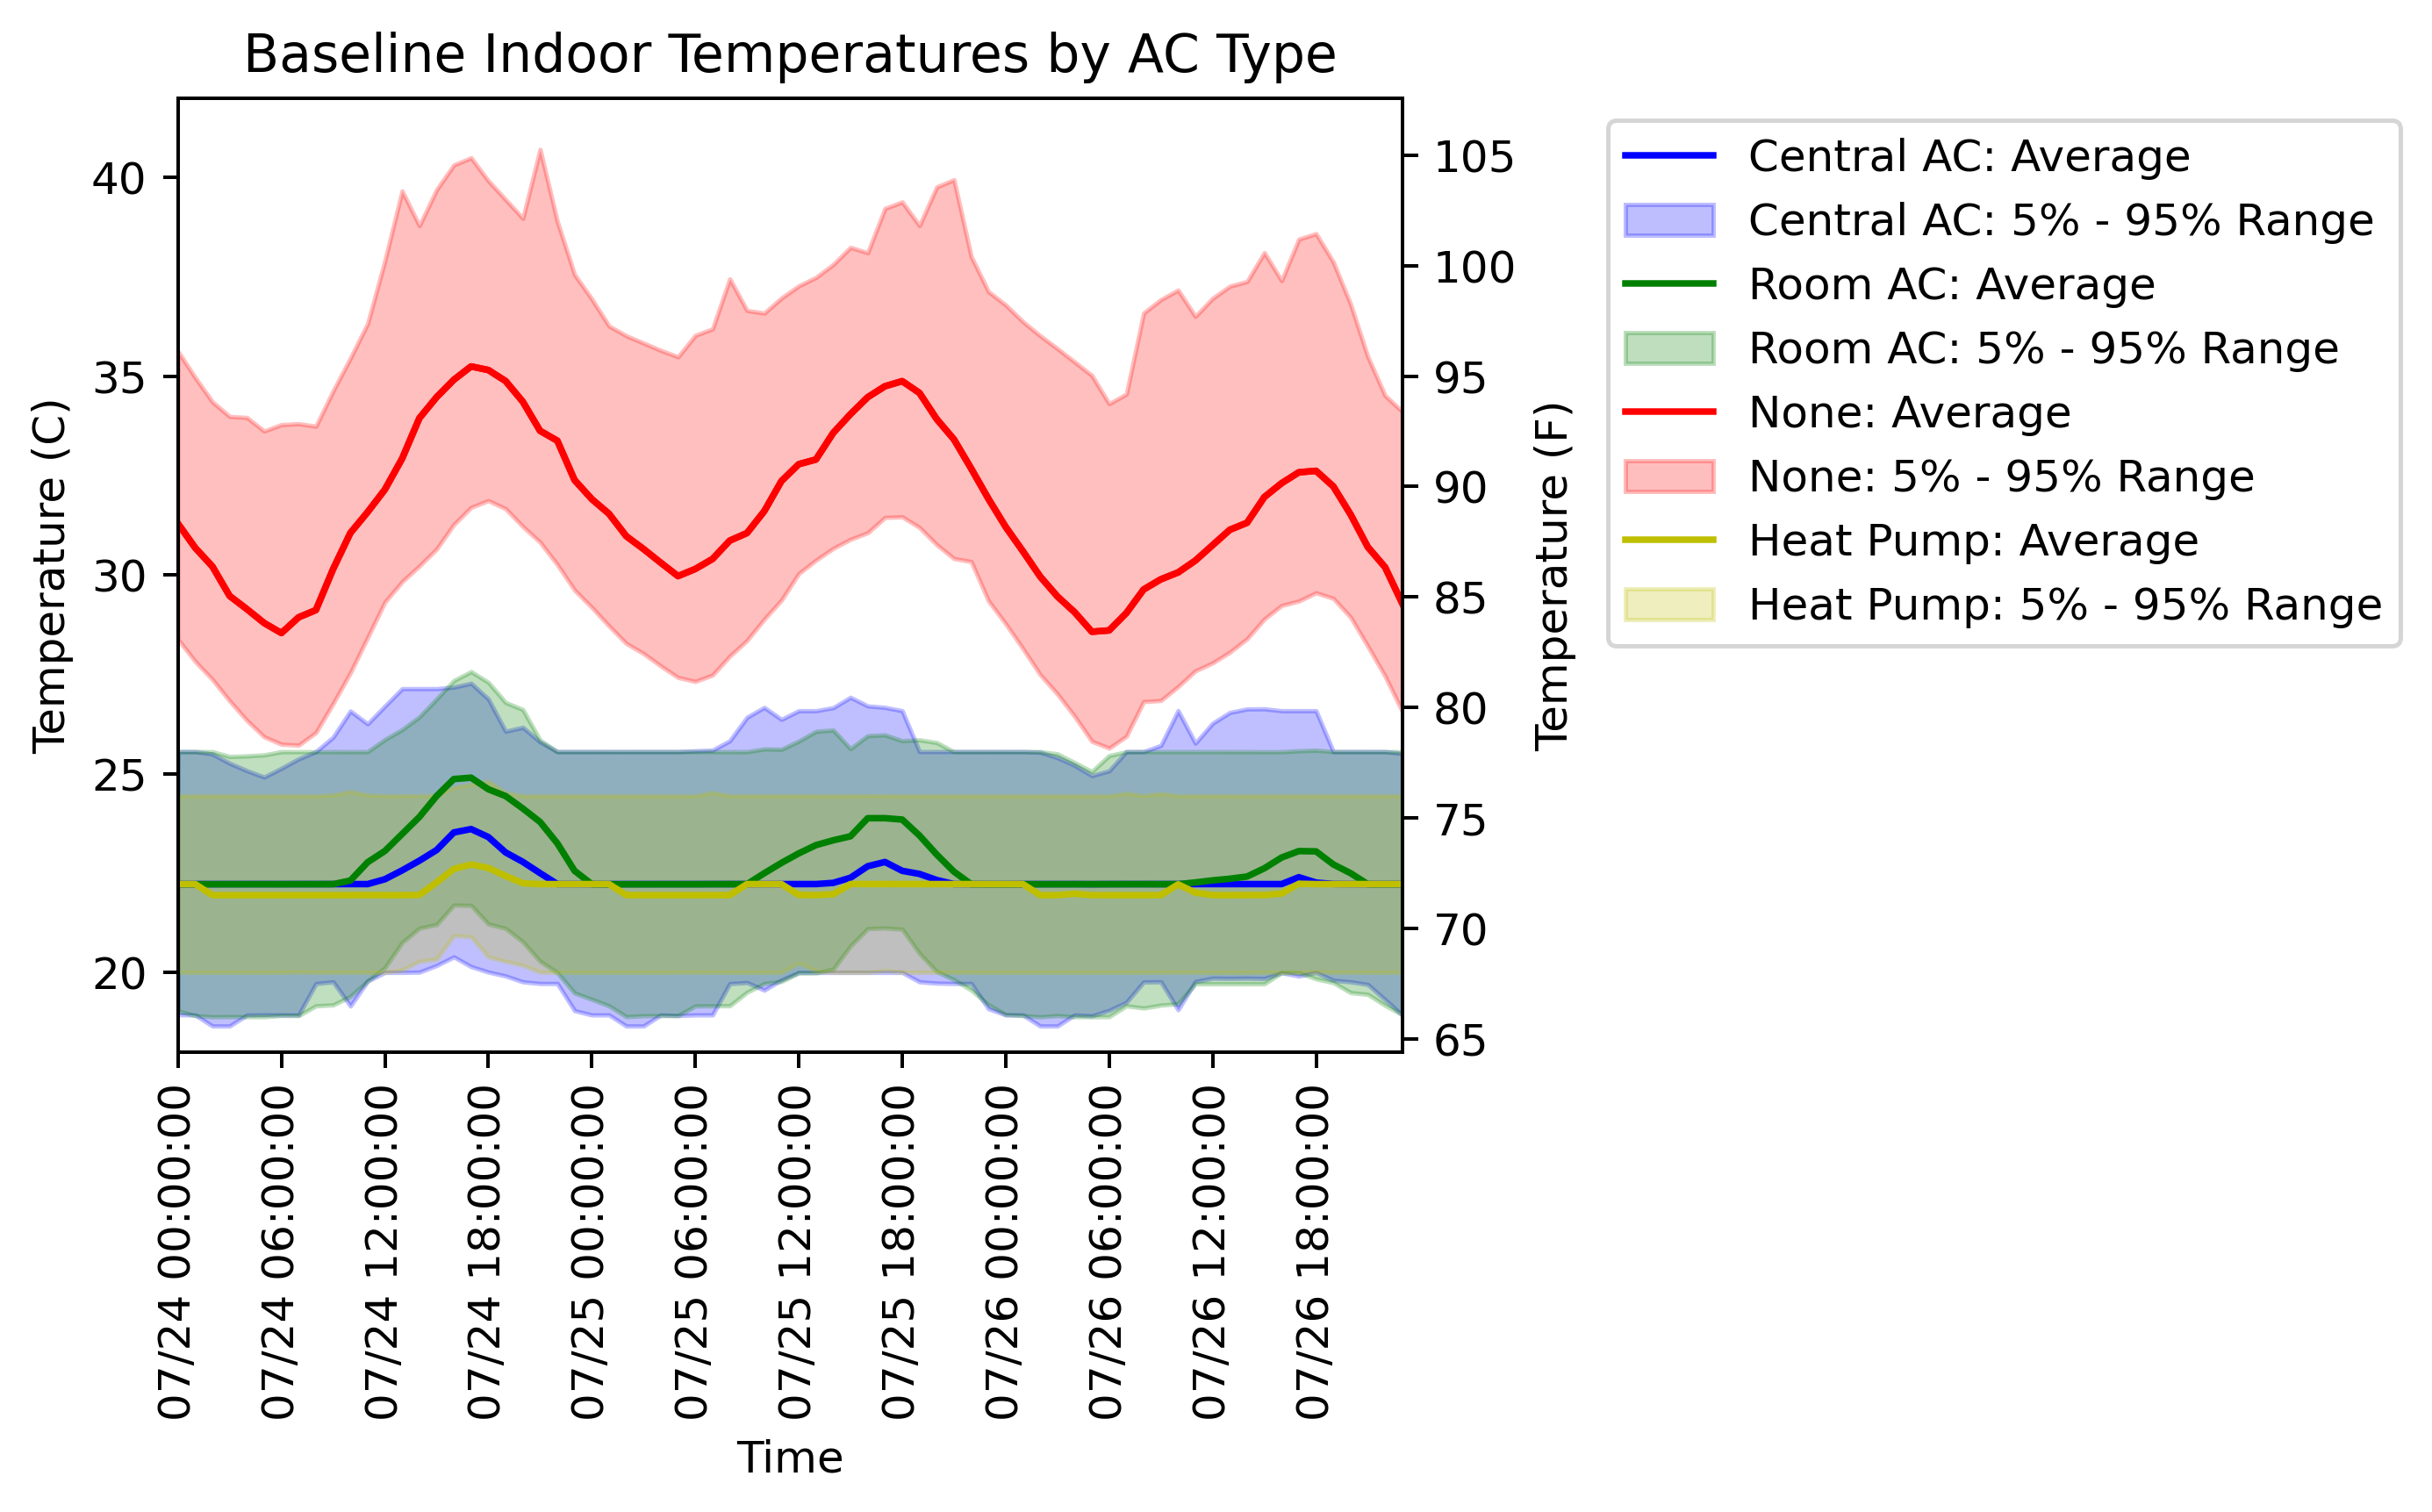

In [16]:

baseline_summary = pd.DataFrame()
baseline_summary['Date/Time'] = baseline_temperature['Date/Time']
f4, ax4=plt.subplots(figsize=(5,4),dpi=360)

for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
    cols = 'bldg' + metadata.loc[metadata['in.hvac_cooling_type']== hvac_type]['bldg_id'].astype(str)
    subset = pd.DataFrame(baseline_temperature, columns=cols)
    baseline_summary[hvac_type + ' - T - 5%'] = subset.quantile(q=.05,axis=1)
    baseline_summary[hvac_type + ' - T - 50%'] =subset.quantile(q=.5,axis=1)
    baseline_summary[hvac_type + ' - T - 95%'] = subset.quantile(q=.95,axis=1)
    if hvac_type == 'Central AC':
        hvac_color = 'b'
    elif hvac_type == 'Room AC':
        hvac_color = 'g'
    elif hvac_type == 'None':
        hvac_color = 'r'
    else:
        hvac_color = 'y'
    ax4.plot(baseline_summary['Date/Time'],baseline_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + ": Average"))
    ax4.fill_between(baseline_summary['Date/Time'], baseline_summary[hvac_type + ' - T - 5%'], baseline_summary[hvac_type + ' - T - 95%'],alpha=.25,color=hvac_color,label= str(hvac_type + ": 5% - 95% Range"))

x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax4.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax4b=ax4.twinx()
ax4b.plot(baseline_summary['Date/Time'],32+(9/5)*baseline_summary['None - T - 50%'],color = 'r')
ax4.set_xlim(min(baseline_summary['Date/Time']),max(baseline_summary['Date/Time']))
y_min = 2*math.floor(baseline_summary['Central AC - T - 5%'].min()/2)
y_max = 2*math.ceil(baseline_summary['None - T - 95%'].max()/2)
ax4.set_ylim((y_min,y_max))
ax4b.set_ylim((32+(9/5)*y_min,32+(9/5)*y_max))
ax4b.set_ylabel('Temperature (F)')
ax4.set_xlabel('Time')
ax4.set_ylabel('Temperature (C)')
ax4.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left')
ax4.set_title('Baseline Indoor Temperatures by AC Type')

In [17]:
# Area plots for each outage
# pick a color for temp, temp_diff, electricity, gas 

In [18]:
# Outage
otg = '2'
outage_temperature = pd.read_csv(data_file_path + "/summary/outage_temperature_" + otg + "_hr.csv")
outage_temperature['Date/Time'] = pd.to_datetime(outage_temperature['Date/Time'])
outage_temp_diff = pd.read_csv(data_file_path + "/summary/outage_temp_diff_" + otg + "_hr.csv")
outage_temp_diff['Date/Time'] = pd.to_datetime(outage_temp_diff['Date/Time'])
outage_electricity = pd.read_csv(data_file_path + "/summary/outage_electricity_" + otg + "_hr.csv")
outage_electricity['Date/Time'] = pd.to_datetime(outage_electricity['Date/Time'])
outage_gas = pd.read_csv(data_file_path + "/summary/outage_gas_" + otg + "_hr.csv")
outage_gas['Date/Time'] = pd.to_datetime(outage_gas['Date/Time'])

window_start = otg_start - pd.Timedelta(6,"H")
window_end = otg_start + pd.Timedelta(6,"H")
otg_end = otg_start + pd.Timedelta(int(otg),"H")

Text(0.5, 1.0, 'Outage Indoor Temperatures by AC Type')

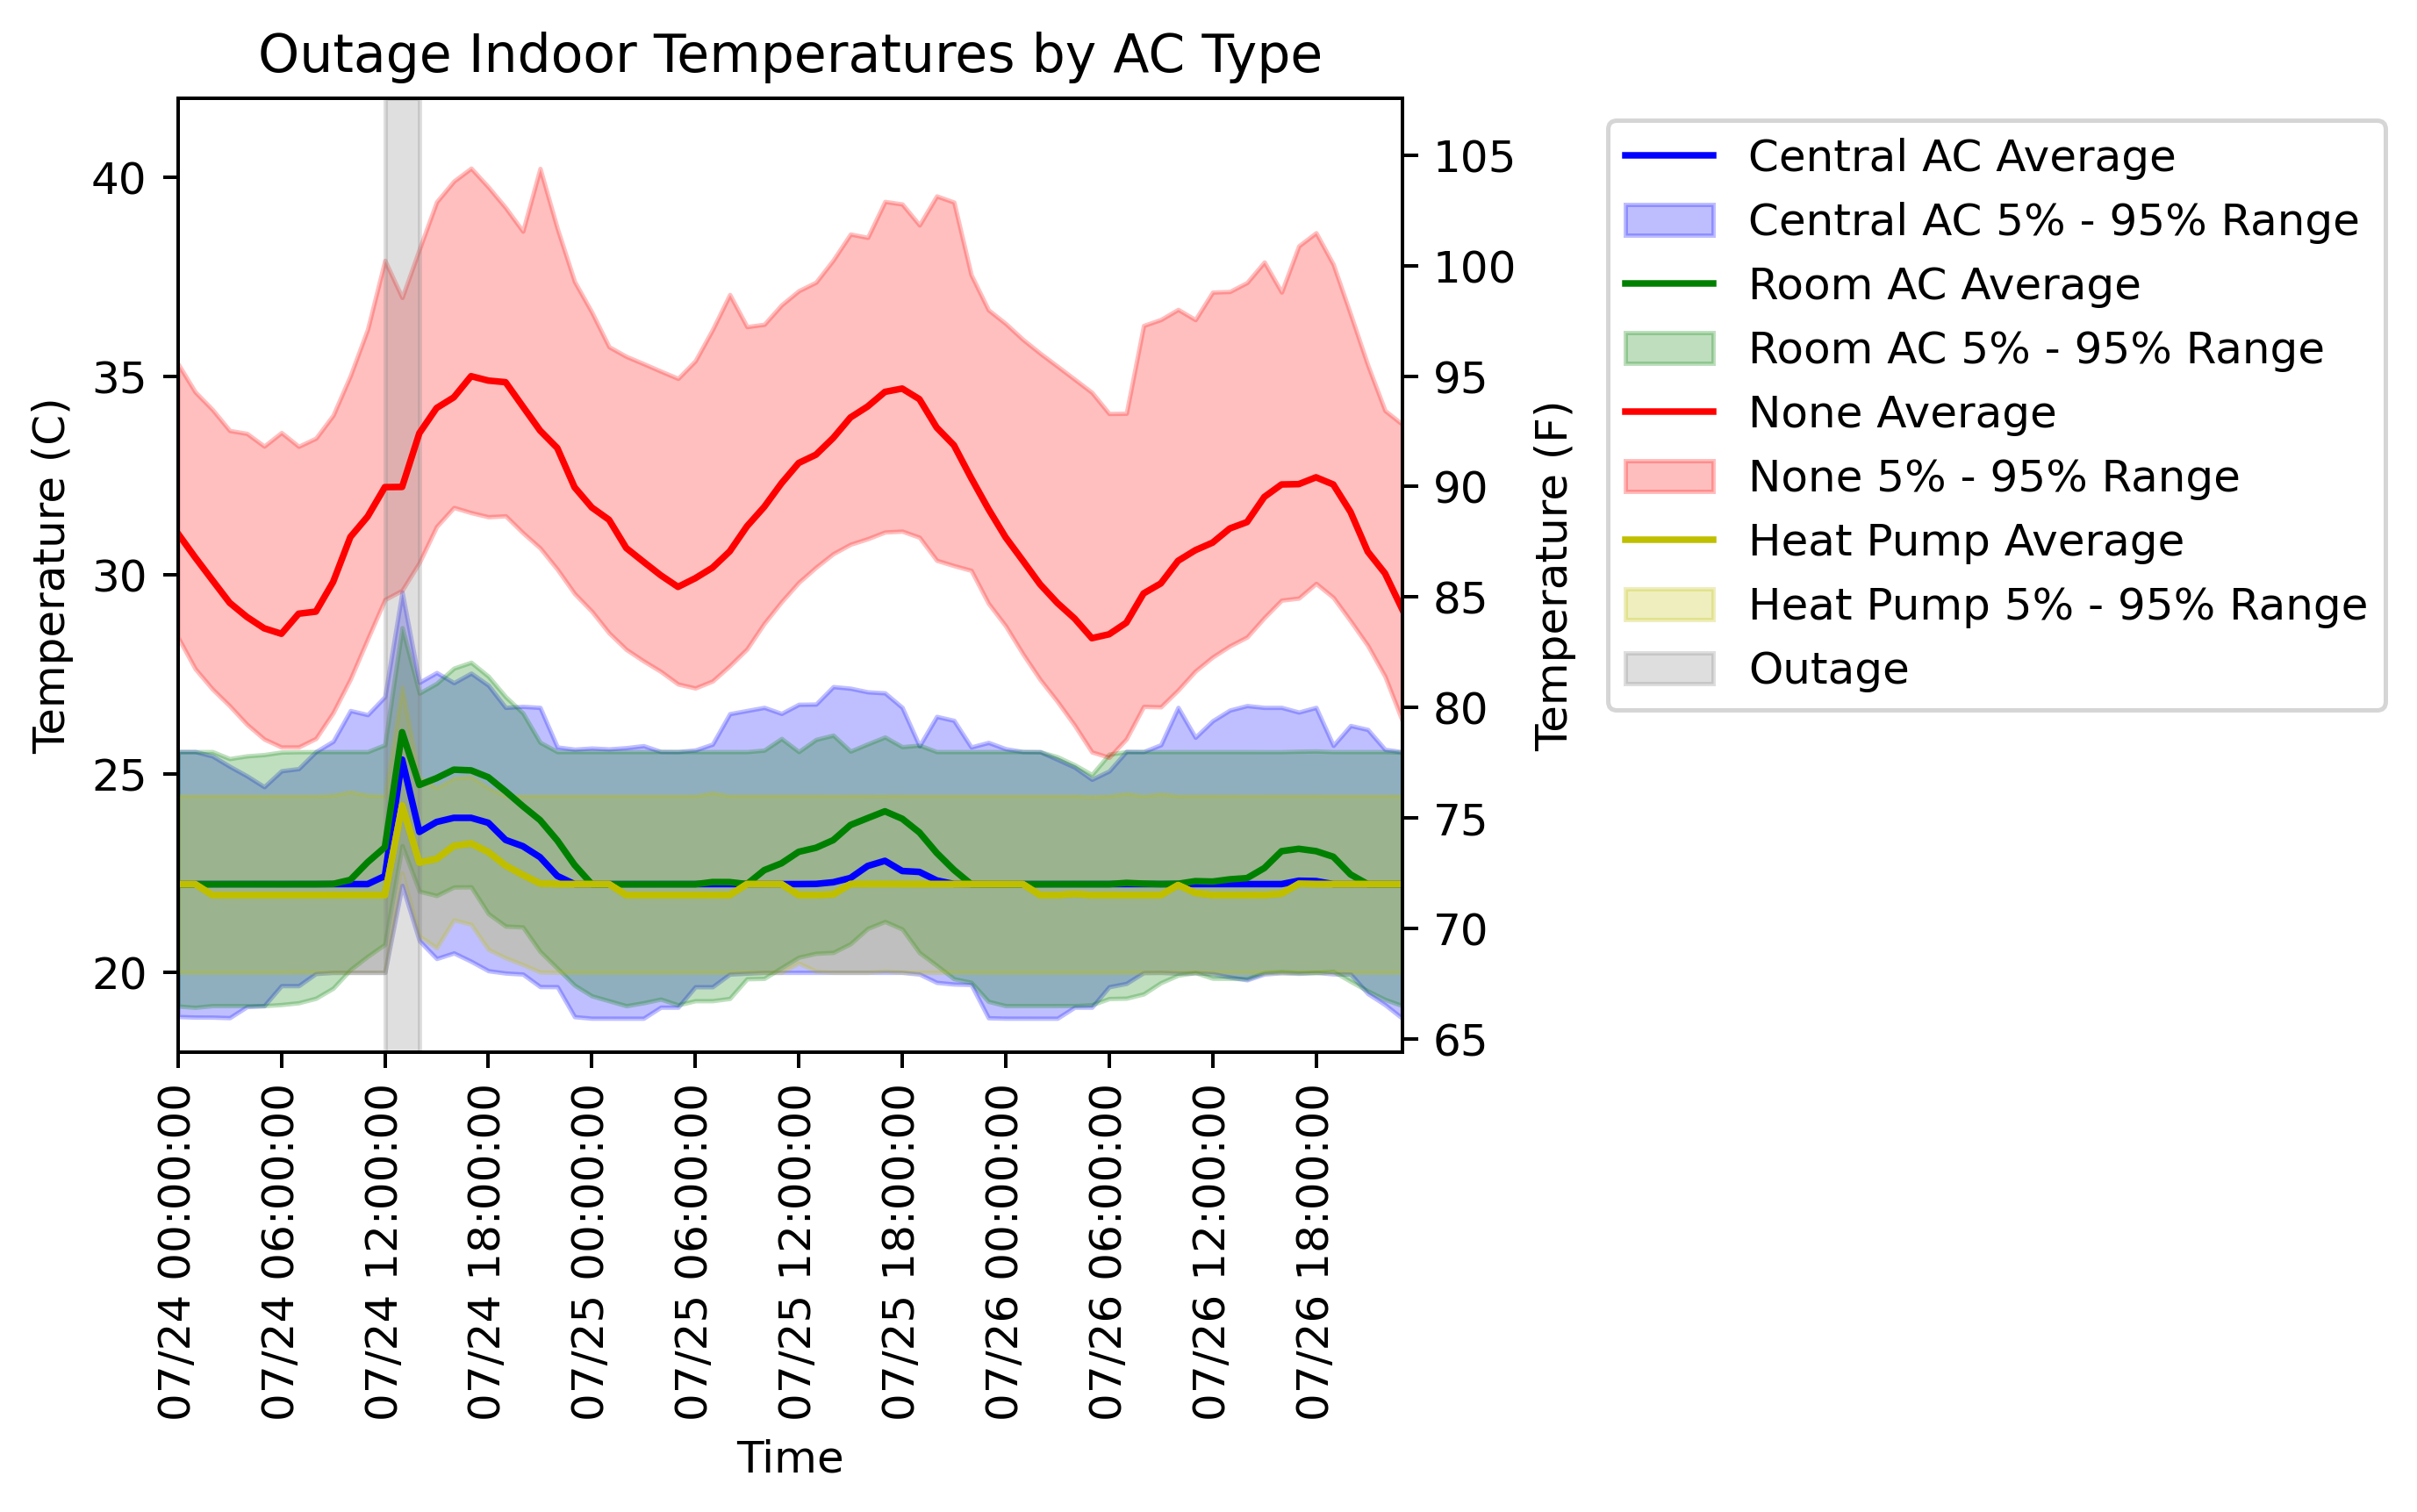

In [19]:
outage_summary = pd.DataFrame()
outage_summary['Date/Time'] = outage_temperature['Date/Time']

f5,ax5=plt.subplots(figsize=(5,4),dpi=360)
for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
    cols = 'bldg' + metadata.loc[metadata['in.hvac_cooling_type']== hvac_type]['bldg_id'].astype(str)
    subset = pd.DataFrame(outage_temperature, columns=cols)
    outage_summary[hvac_type + ' - T - 5%'] = subset.quantile(q=.05,axis=1)
    outage_summary[hvac_type + ' - T - 50%'] =subset.quantile(q=.5,axis=1)
    outage_summary[hvac_type + ' - T - 95%'] = subset.quantile(q=.95,axis=1)
    if hvac_type == 'Central AC':
        hvac_color = 'b'
    elif hvac_type == 'Room AC':
        hvac_color = 'g'
    elif hvac_type == 'None':
        hvac_color = 'r'
    else:
        hvac_color = 'y'
    ax5.plot(outage_summary['Date/Time'],outage_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + " Average"))
    ax5.fill_between(outage_summary['Date/Time'], outage_summary[hvac_type + ' - T - 5%'], outage_summary[hvac_type + ' - T - 95%'],alpha=.25,color=hvac_color,label= str(hvac_type + " 5% - 95% Range"))
x_ticks = pd.date_range(start =min(outage_summary['Date/Time']), end =max(outage_summary['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax5.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax5.set_xlabel('Time')
ax5.set_ylabel('Temperature (C)')
ax5.set_xlim(min(outage_summary['Date/Time']),max(outage_summary['Date/Time']))
y_min = 2*math.floor(outage_summary['Central AC - T - 5%'].min()/2)
y_max = 2*math.ceil(outage_summary['None - T - 95%'].max()/2)
ax5.fill_between([otg_start, otg_end],[y_max,y_max],alpha=.25,color='grey',label= "Outage")
ax5.set_ylim((y_min,y_max))
ax5b = ax5.twinx()
ax5b.plot(outage_summary['Date/Time'],32+(9/5)*outage_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + " Average"))
ax5b.set_ylim((32+(9/5)*y_min,32+(9/5)*y_max))
ax5b.set_ylabel('Temperature (F)')
ax5.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left')
ax5.set_title('Outage Indoor Temperatures by AC Type')

Text(0.5, 1.0, 'Outage Indoor Temperatures by AC Type')

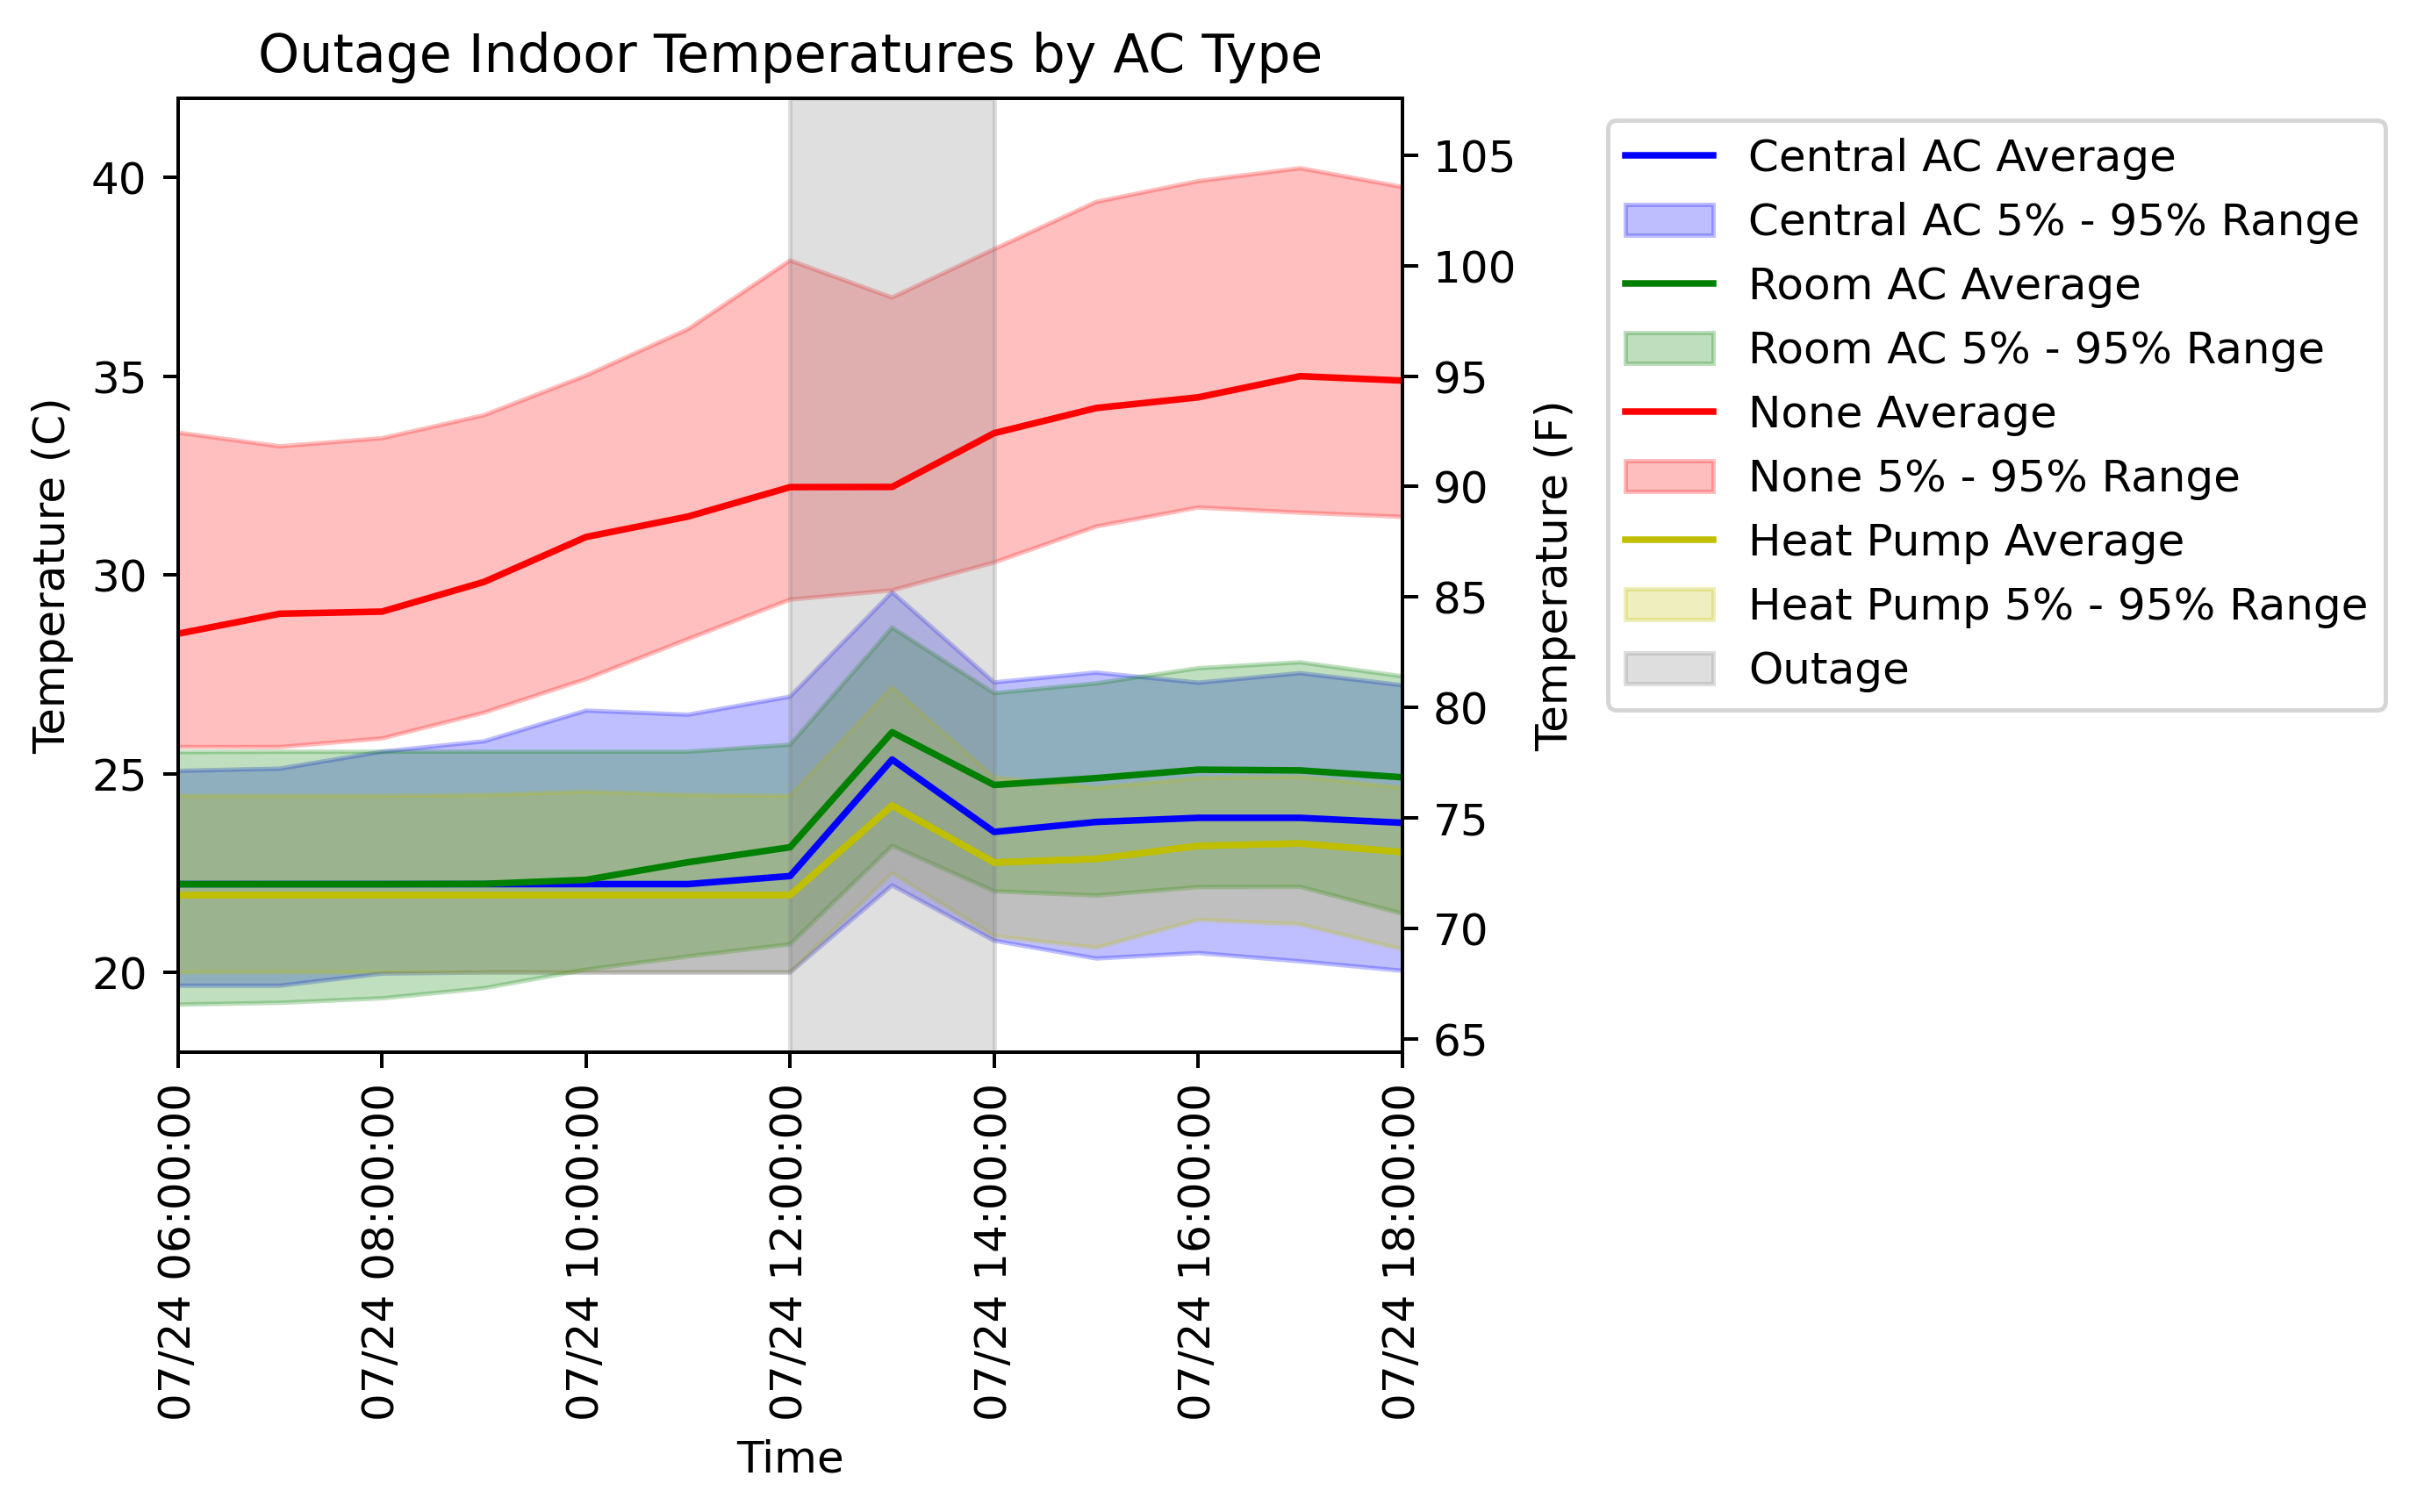

In [20]:
outage_summary = pd.DataFrame()
outage_summary['Date/Time'] = outage_temperature['Date/Time']
f6,ax6=plt.subplots(figsize=(5,4),dpi=360)
for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
    cols = 'bldg' + metadata.loc[metadata['in.hvac_cooling_type']== hvac_type]['bldg_id'].astype(str)
    subset = pd.DataFrame(outage_temperature, columns=cols)
    outage_summary[hvac_type + ' - T - 5%'] = subset.quantile(q=.05,axis=1)
    outage_summary[hvac_type + ' - T - 50%'] =subset.quantile(q=.5,axis=1)
    outage_summary[hvac_type + ' - T - 95%'] = subset.quantile(q=.95,axis=1)
    if hvac_type == 'Central AC':
        hvac_color = 'b'
    elif hvac_type == 'Room AC':
        hvac_color = 'g'
    elif hvac_type == 'None':
        hvac_color = 'r'
    else:
        hvac_color = 'y'
    ax6.plot(outage_summary['Date/Time'],outage_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + " Average"))
    ax6.fill_between(outage_summary['Date/Time'], outage_summary[hvac_type + ' - T - 5%'], outage_summary[hvac_type + ' - T - 95%'],alpha=.25,color=hvac_color,label= str(hvac_type + " 5% - 95% Range"))

x_ticks = pd.date_range(start =min(outage_summary['Date/Time']), end =max(outage_summary['Date/Time']),freq ='2H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax6.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax6.set_xlim(window_start,window_end)
ax6.set_xlabel('Time')
ax6.set_ylabel('Temperature (C)')
y_min = 2*math.floor(outage_summary['Central AC - T - 5%'].min()/2)
y_max = 2*math.ceil(outage_summary['None - T - 95%'].max()/2)
ax6.fill_between([otg_start, otg_end],[y_max,y_max],alpha=.25,color='grey',label= "Outage")
ax6.set_ylim((y_min,y_max))
ax6b = ax6.twinx()
ax6b.plot(outage_summary['Date/Time'],32+(9/5)*outage_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + " Average"))
ax6b.set_ylim((32+(9/5)*y_min,32+(9/5)*y_max))
ax6b.set_ylabel('Temperature (F)')
ax6.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left')
ax6.set_title('Outage Indoor Temperatures by AC Type')

Text(0.5, 1.0, 'Average Outage Temperature to Baseline Comparision by AC Type')

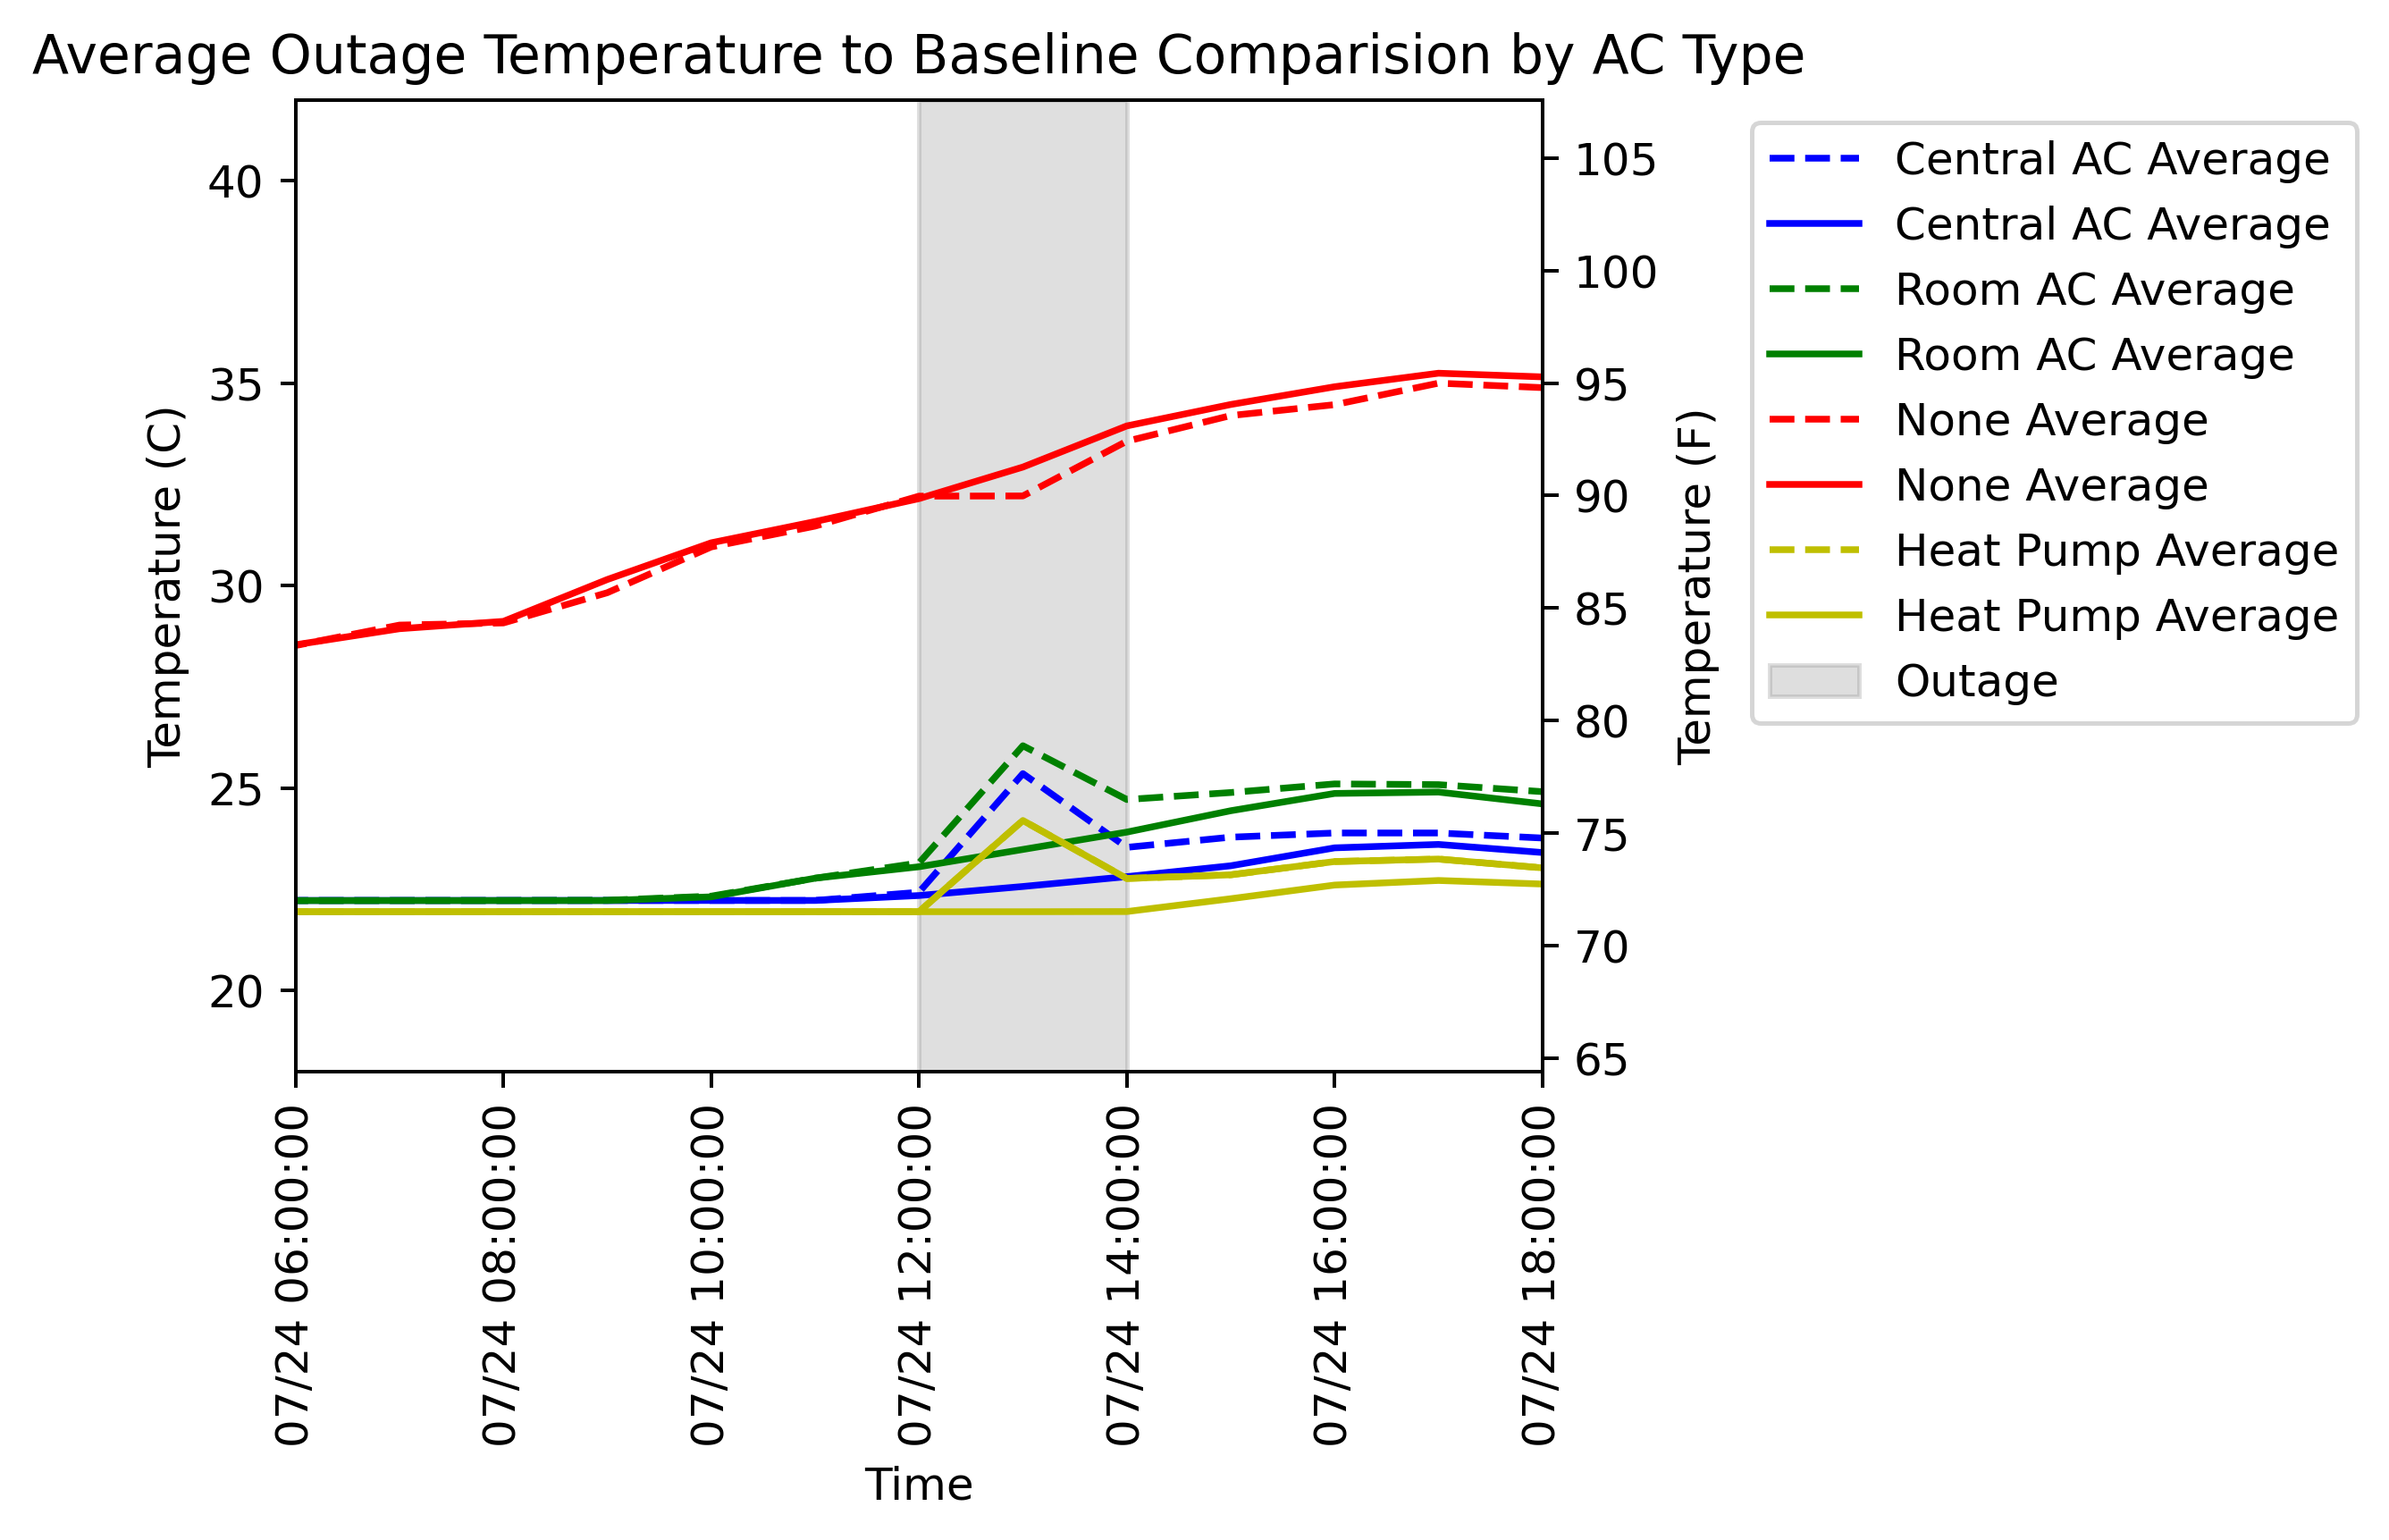

In [21]:
f7,ax7=plt.subplots(figsize=(5,4),dpi=360)
for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
    if hvac_type == 'Central AC':
        hvac_color = 'b'
    elif hvac_type == 'Room AC':
        hvac_color = 'g'
    elif hvac_type == 'None':
        hvac_color = 'r'
    else:
        hvac_color = 'y'
    ax7.plot(outage_summary['Date/Time'],outage_summary[hvac_type + ' - T - 50%'],color = hvac_color,linestyle='dashed',label= str(hvac_type + " Average"))
    #plt.fill_between(outage_summary['Date/Time'], outage_summary[hvac_type + ' - T - 5%'], outage_summary[hvac_type + ' - T - 95%'],alpha=.25,color=hvac_color,label= str(hvac_type + " 5% - 95% Range"))
    ax7.plot(baseline_summary['Date/Time'],baseline_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + " Average"))

x_ticks = pd.date_range(start =min(outage_summary['Date/Time']), end =max(outage_summary['Date/Time']),freq ='2H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax7.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax7.set_xlim(window_start,window_end)
y_min = 2*math.floor(outage_summary['Central AC - T - 5%'].min()/2)
y_max = 2*math.ceil(outage_summary['None - T - 95%'].max()/2)
ax7.fill_between([otg_start, otg_end],[y_max,y_max],alpha=.25,color='grey',label= "Outage")
ax7.set_ylim((y_min,y_max))
ax7.set_xlabel('Time')
ax7.set_ylabel('Temperature (C)')
ax7b = ax7.twinx()
ax7b.plot(outage_summary['Date/Time'],32+(9/5)*outage_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + " Average"))
ax7b.set_ylim((32+(9/5)*y_min,32+(9/5)*y_max))
ax7b.set_ylabel('Temperature (F)')
ax7.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left')
ax7.set_title('Average Outage Temperature to Baseline Comparision by AC Type')

Text(0.5, 1.0, 'Average Outage Temperature to Baseline Comparision by AC Type')

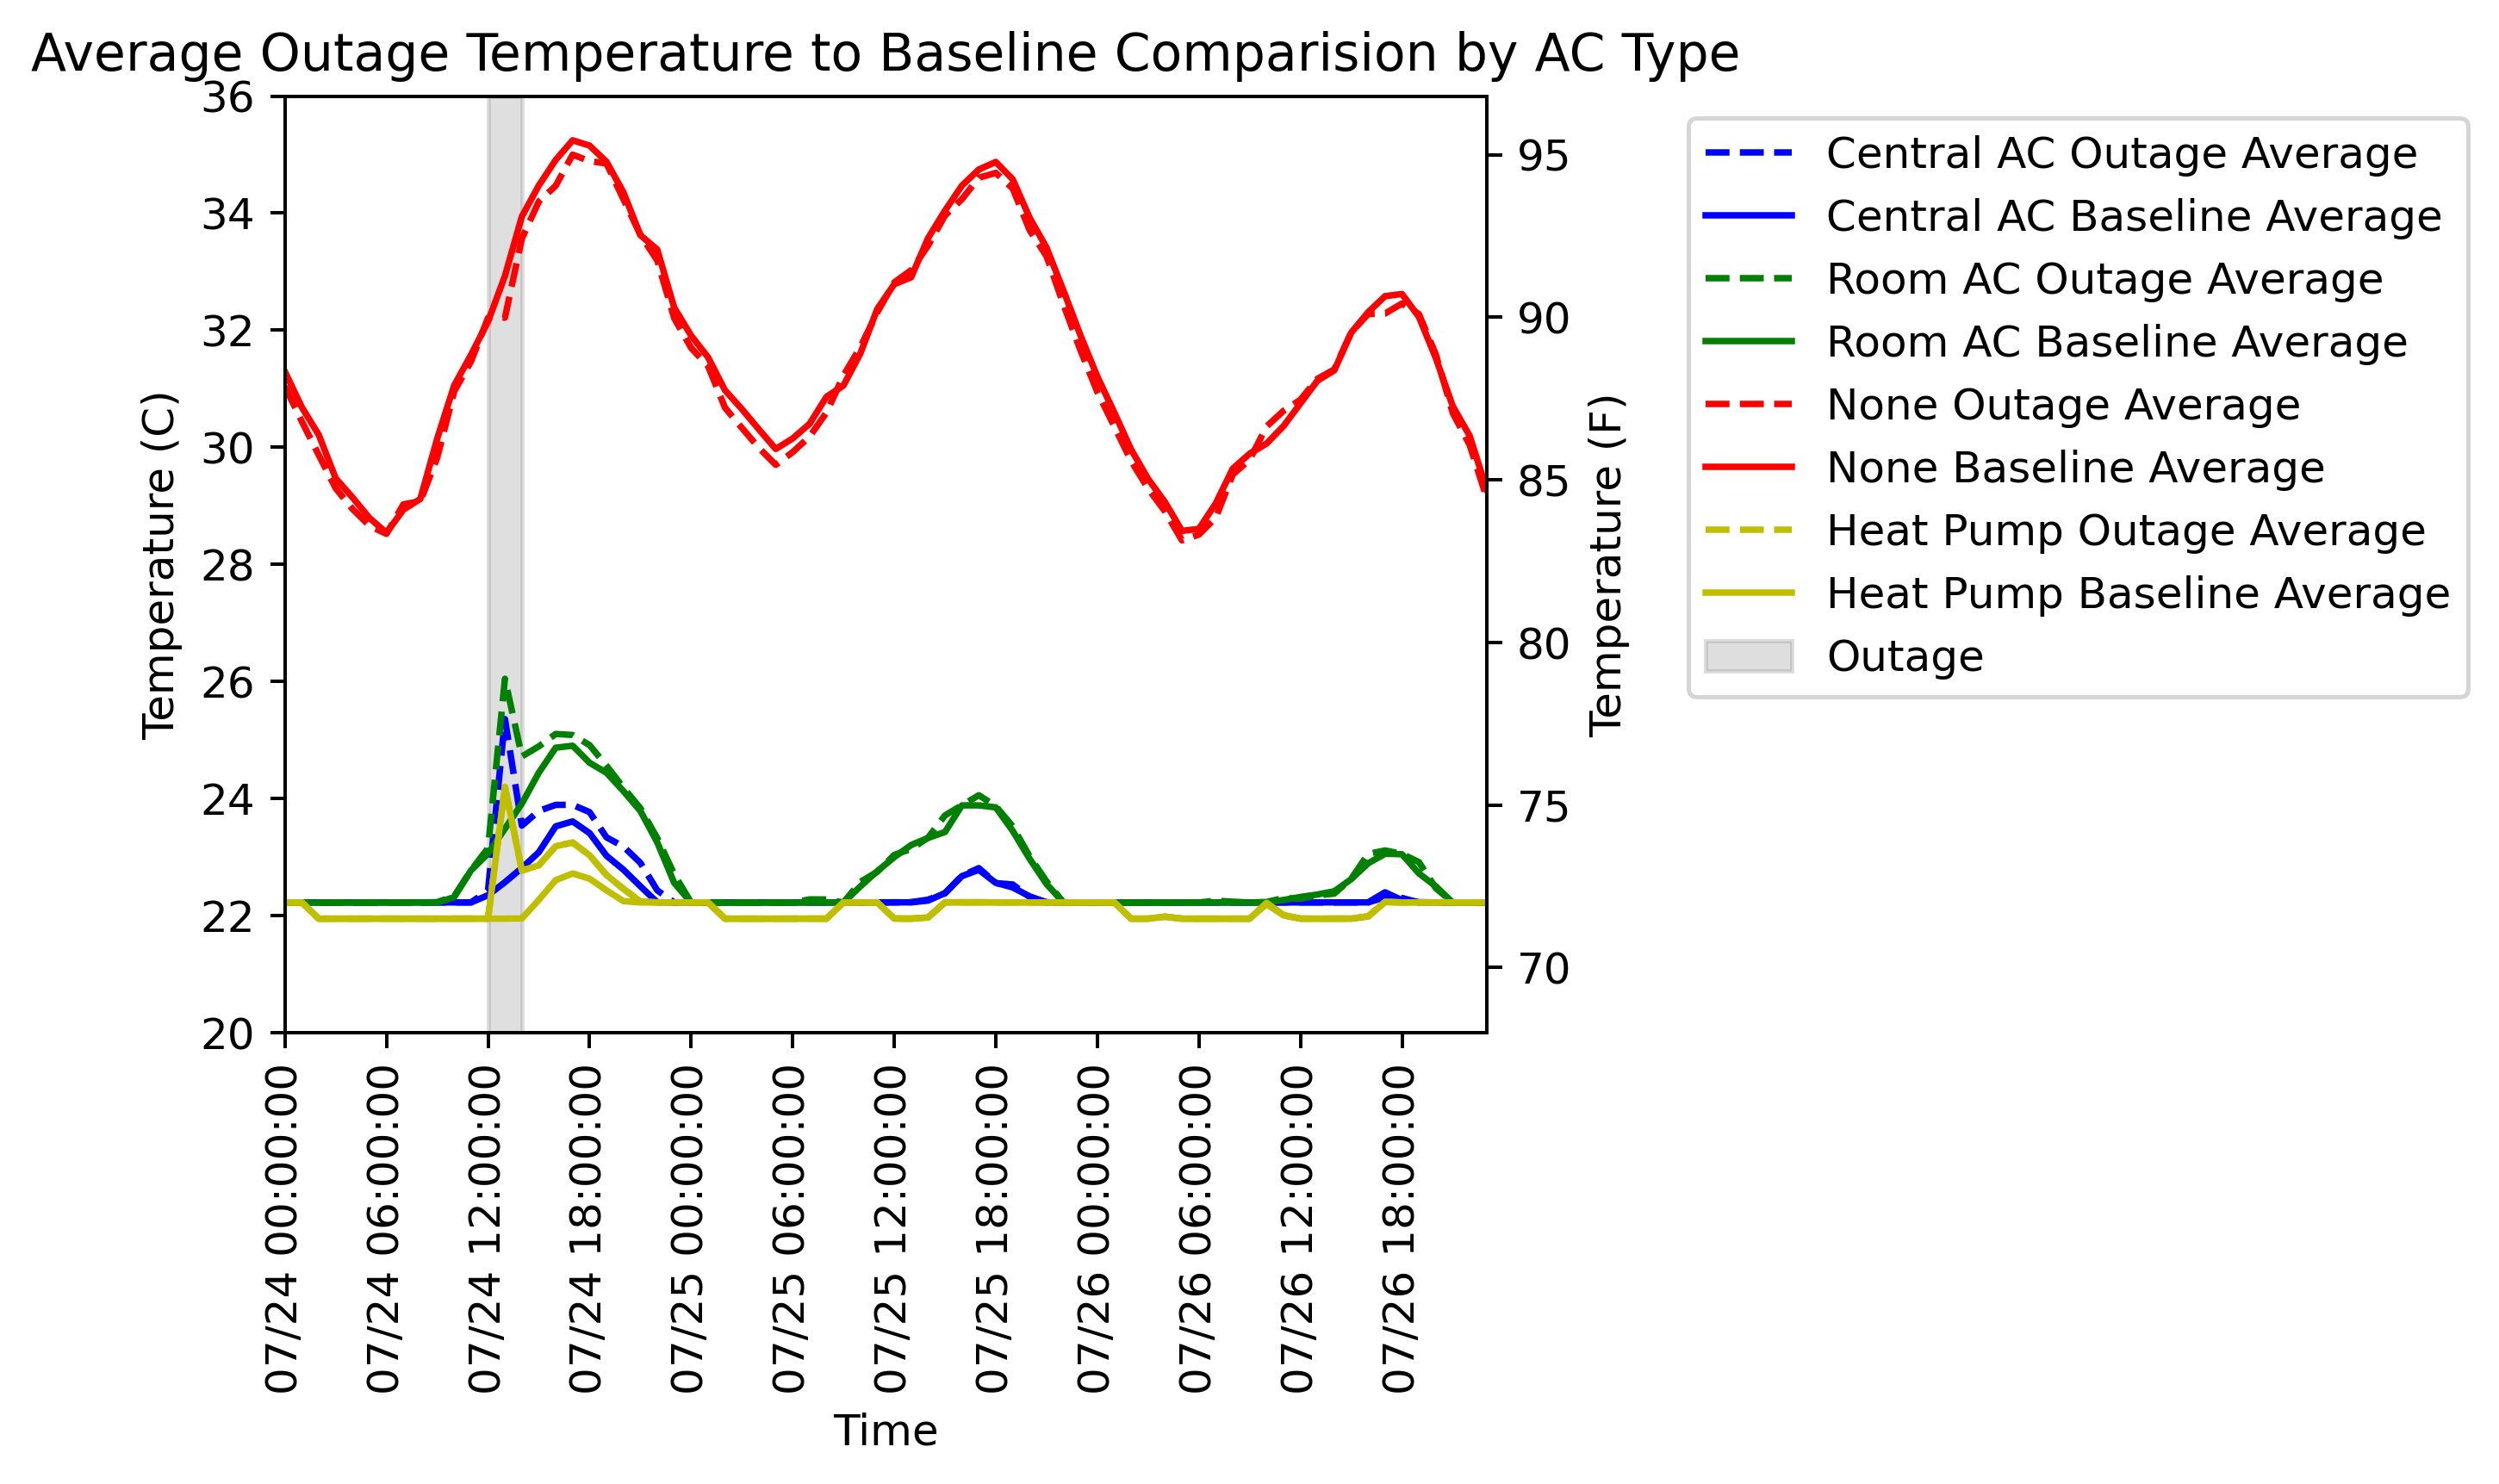

In [22]:
f8,ax8=plt.subplots(figsize=(5,4),dpi=360)
for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
    if hvac_type == 'Central AC':
        hvac_color = 'b'
    elif hvac_type == 'Room AC':
        hvac_color = 'g'
    elif hvac_type == 'None':
        hvac_color = 'r'
    else:
        hvac_color = 'y'
    ax8.plot(outage_summary['Date/Time'],outage_summary[hvac_type + ' - T - 50%'],color = hvac_color,linestyle='dashed',label= str(hvac_type + " Outage Average"))
    #plt.fill_between(outage_summary['Date/Time'], outage_summary[hvac_type + ' - T - 5%'], outage_summary[hvac_type + ' - T - 95%'],alpha=.25,color=hvac_color,label= str(hvac_type + " 5% - 95% Range"))
    ax8.plot(baseline_summary['Date/Time'],baseline_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + " Baseline Average"))

x_ticks = pd.date_range(start =min(outage_summary['Date/Time']), end =max(outage_summary['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax8.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax8.set_xlim(min(outage_summary['Date/Time']),max(outage_summary['Date/Time']))
y_min = 2*math.floor(outage_summary['Central AC - T - 50%'].min()/2)-2
y_max = 2*math.ceil(baseline_summary['None - T - 50%'].max()/2)
ax8.fill_between([otg_start, otg_end],[y_max,y_max],alpha=.25,color='grey',label= "Outage")
ax8.set_ylim((y_min,y_max))
ax8.set_xlabel('Time')
ax8.set_ylabel('Temperature (C)')
ax8b = ax8.twinx()
ax8b.plot(outage_summary['Date/Time'],32+(9/5)*outage_summary[hvac_type + ' - T - 50%'],color = hvac_color,label= str(hvac_type + " Average"))
ax8b.set_ylim((32+(9/5)*y_min,32+(9/5)*y_max))
ax8b.set_ylabel('Temperature (F)')
ax8.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left')
ax8.set_title('Average Outage Temperature to Baseline Comparision by AC Type')


# ELECTRICITY

Text(0.5, 1.0, 'Outage Electricity')

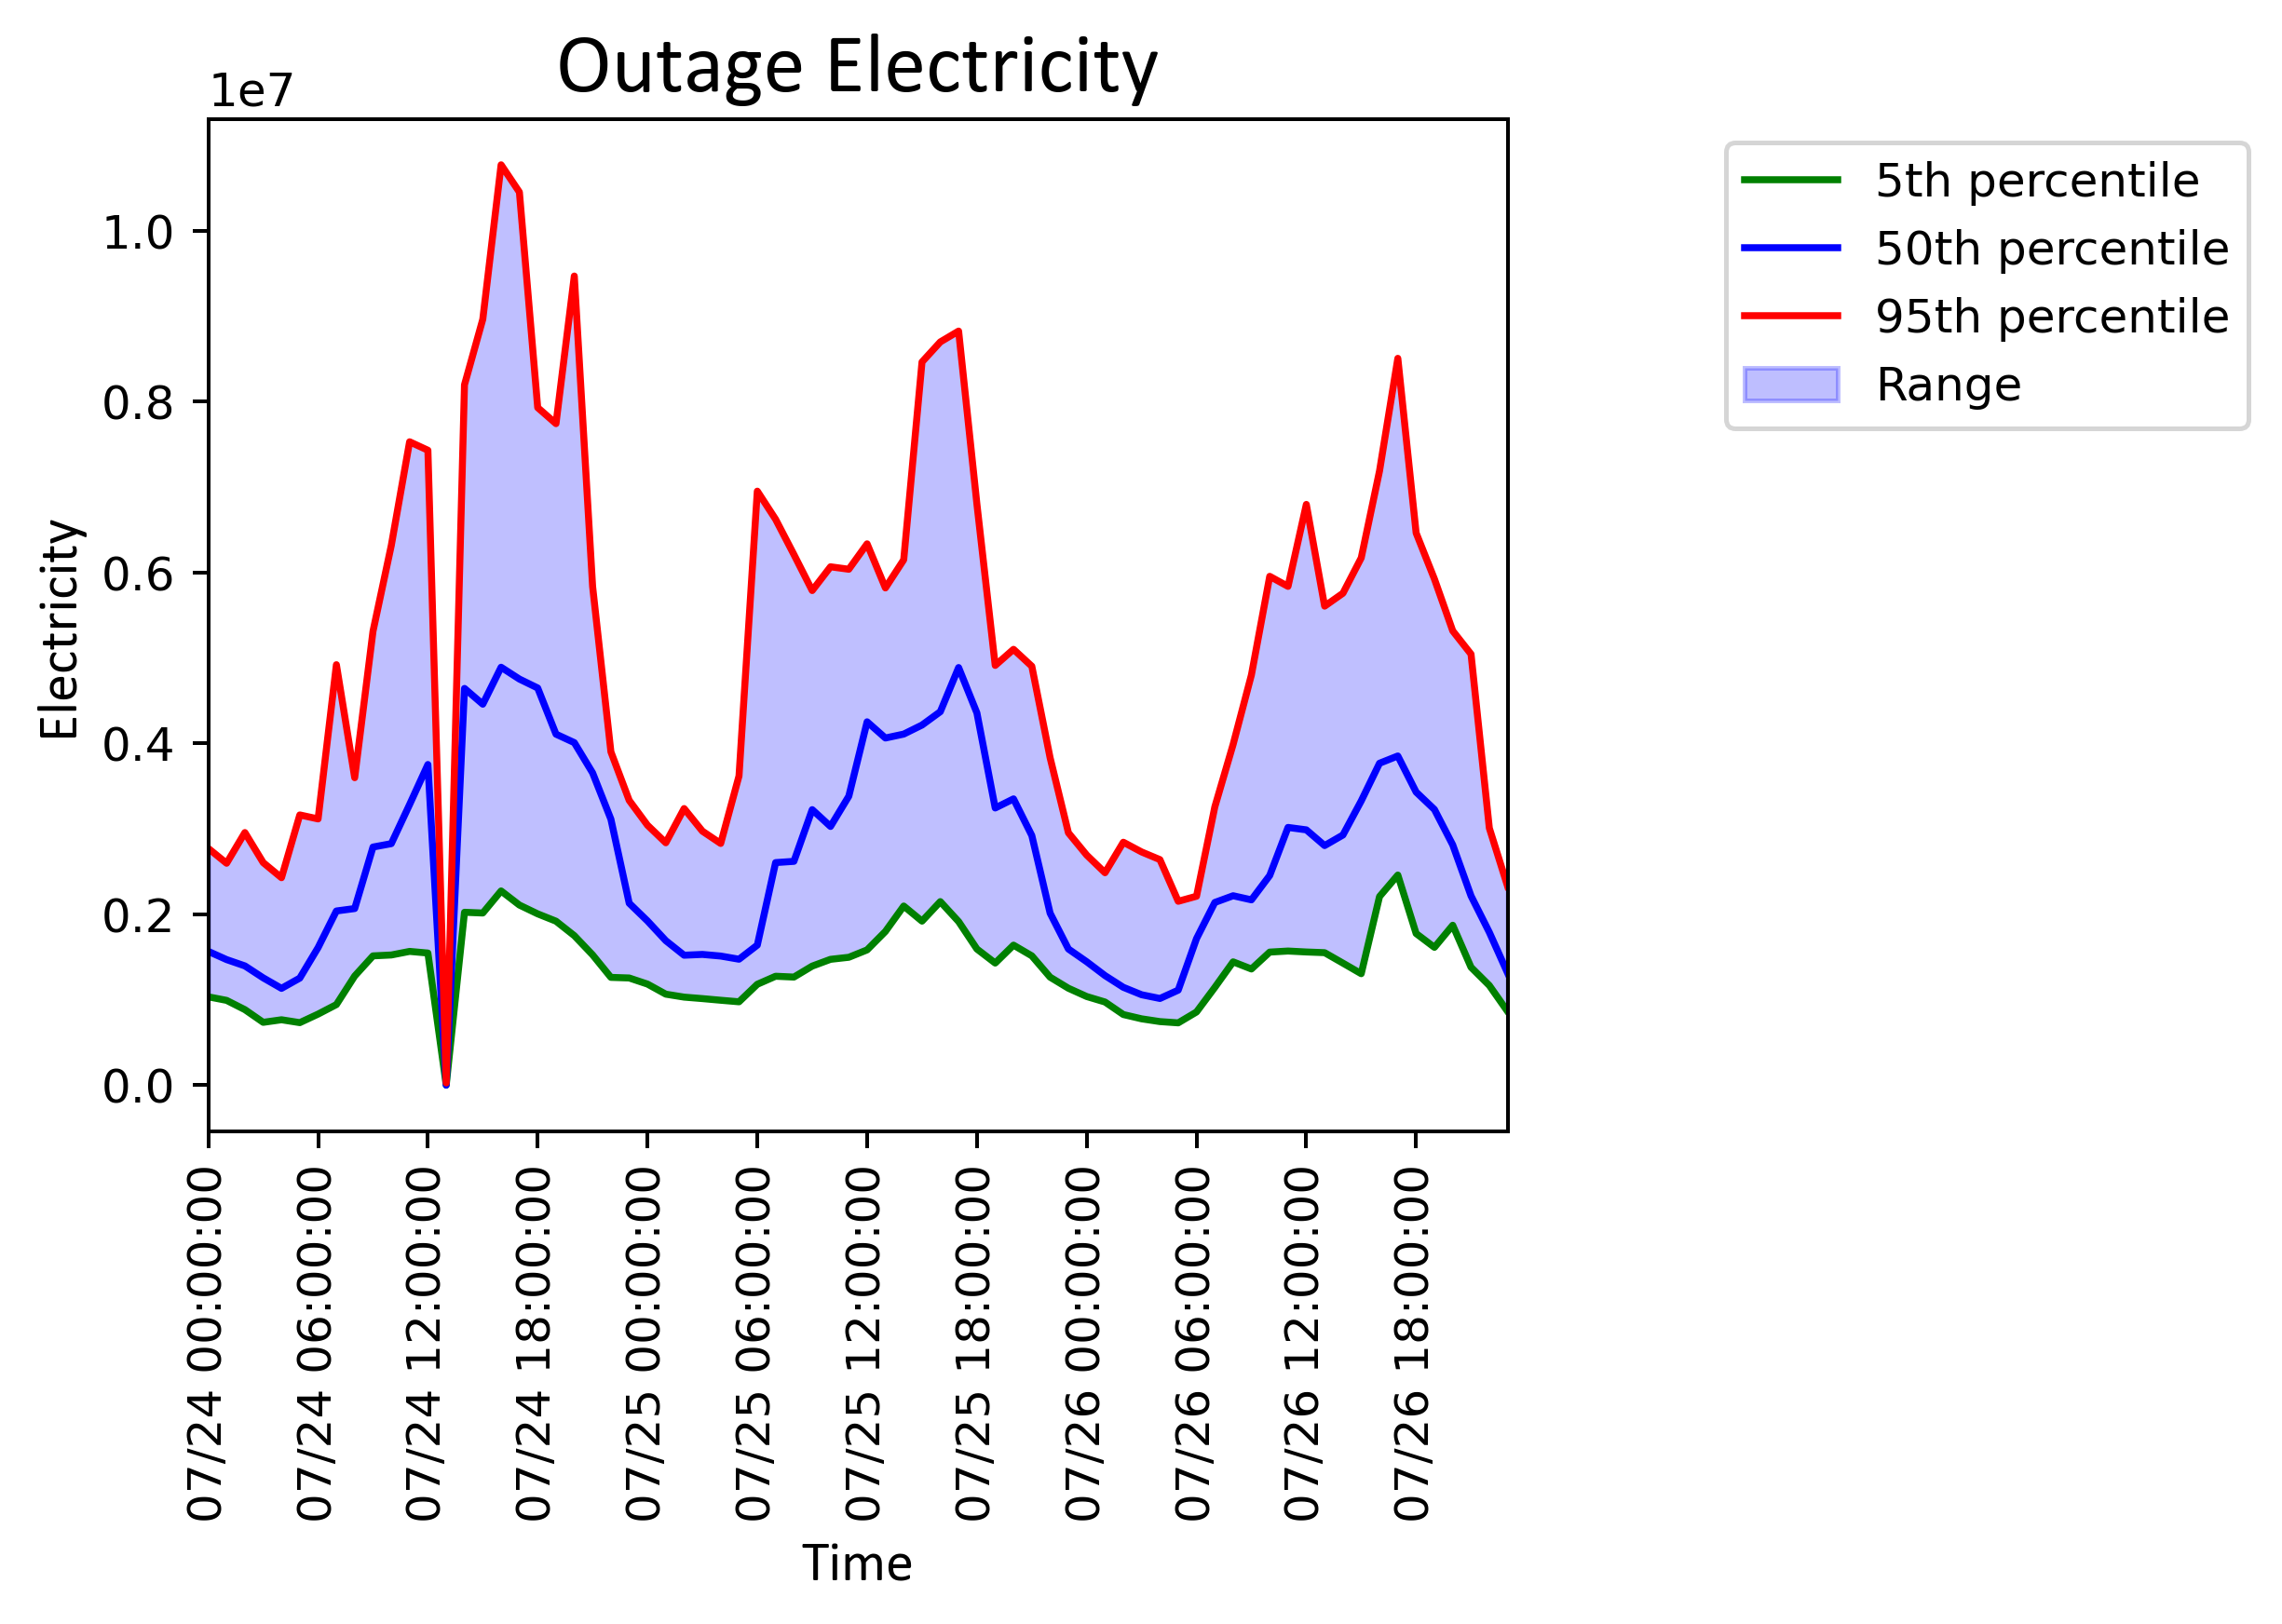

In [34]:
f9, ax9 = plt.subplots(figsize=(5,4),dpi=360)
subset = pd.DataFrame(outage_electricity, columns=cols)
outage_summary['E - 5%'] = subset.quantile(q=.05,axis=1)
outage_summary['E - 50%'] =subset.quantile(q=.5,axis=1)
outage_summary['E - 95%'] = subset.quantile(q=.95,axis=1)
ax9.plot(outage_summary['Date/Time'],outage_summary['E - 5%'],color='g',label="5th percentile")
ax9.plot(outage_summary['Date/Time'],outage_summary['E - 50%'],color = 'b',label="50th percentile")
ax9.plot(outage_summary['Date/Time'],outage_summary['E - 95%'],color='r',label="95th percentile")
ax9.fill_between(outage_summary['Date/Time'], outage_summary['E - 5%'], outage_summary['E - 95%'],alpha=.25,color='b',label="Range")
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax9.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax9.set_xlim(min(outage_summary['Date/Time']),max(outage_summary['Date/Time']))
ax9.set_xlabel('Time',fontsize=labelsize,**labelfont)
ax9.set_ylabel('Electricity',fontsize=labelsize,**labelfont)
ax9.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left')
ax9.set_title('Outage Electricity',fontsize=titlesize,**labelfont)

Text(0.5, 1.0, 'Outage Electricity')

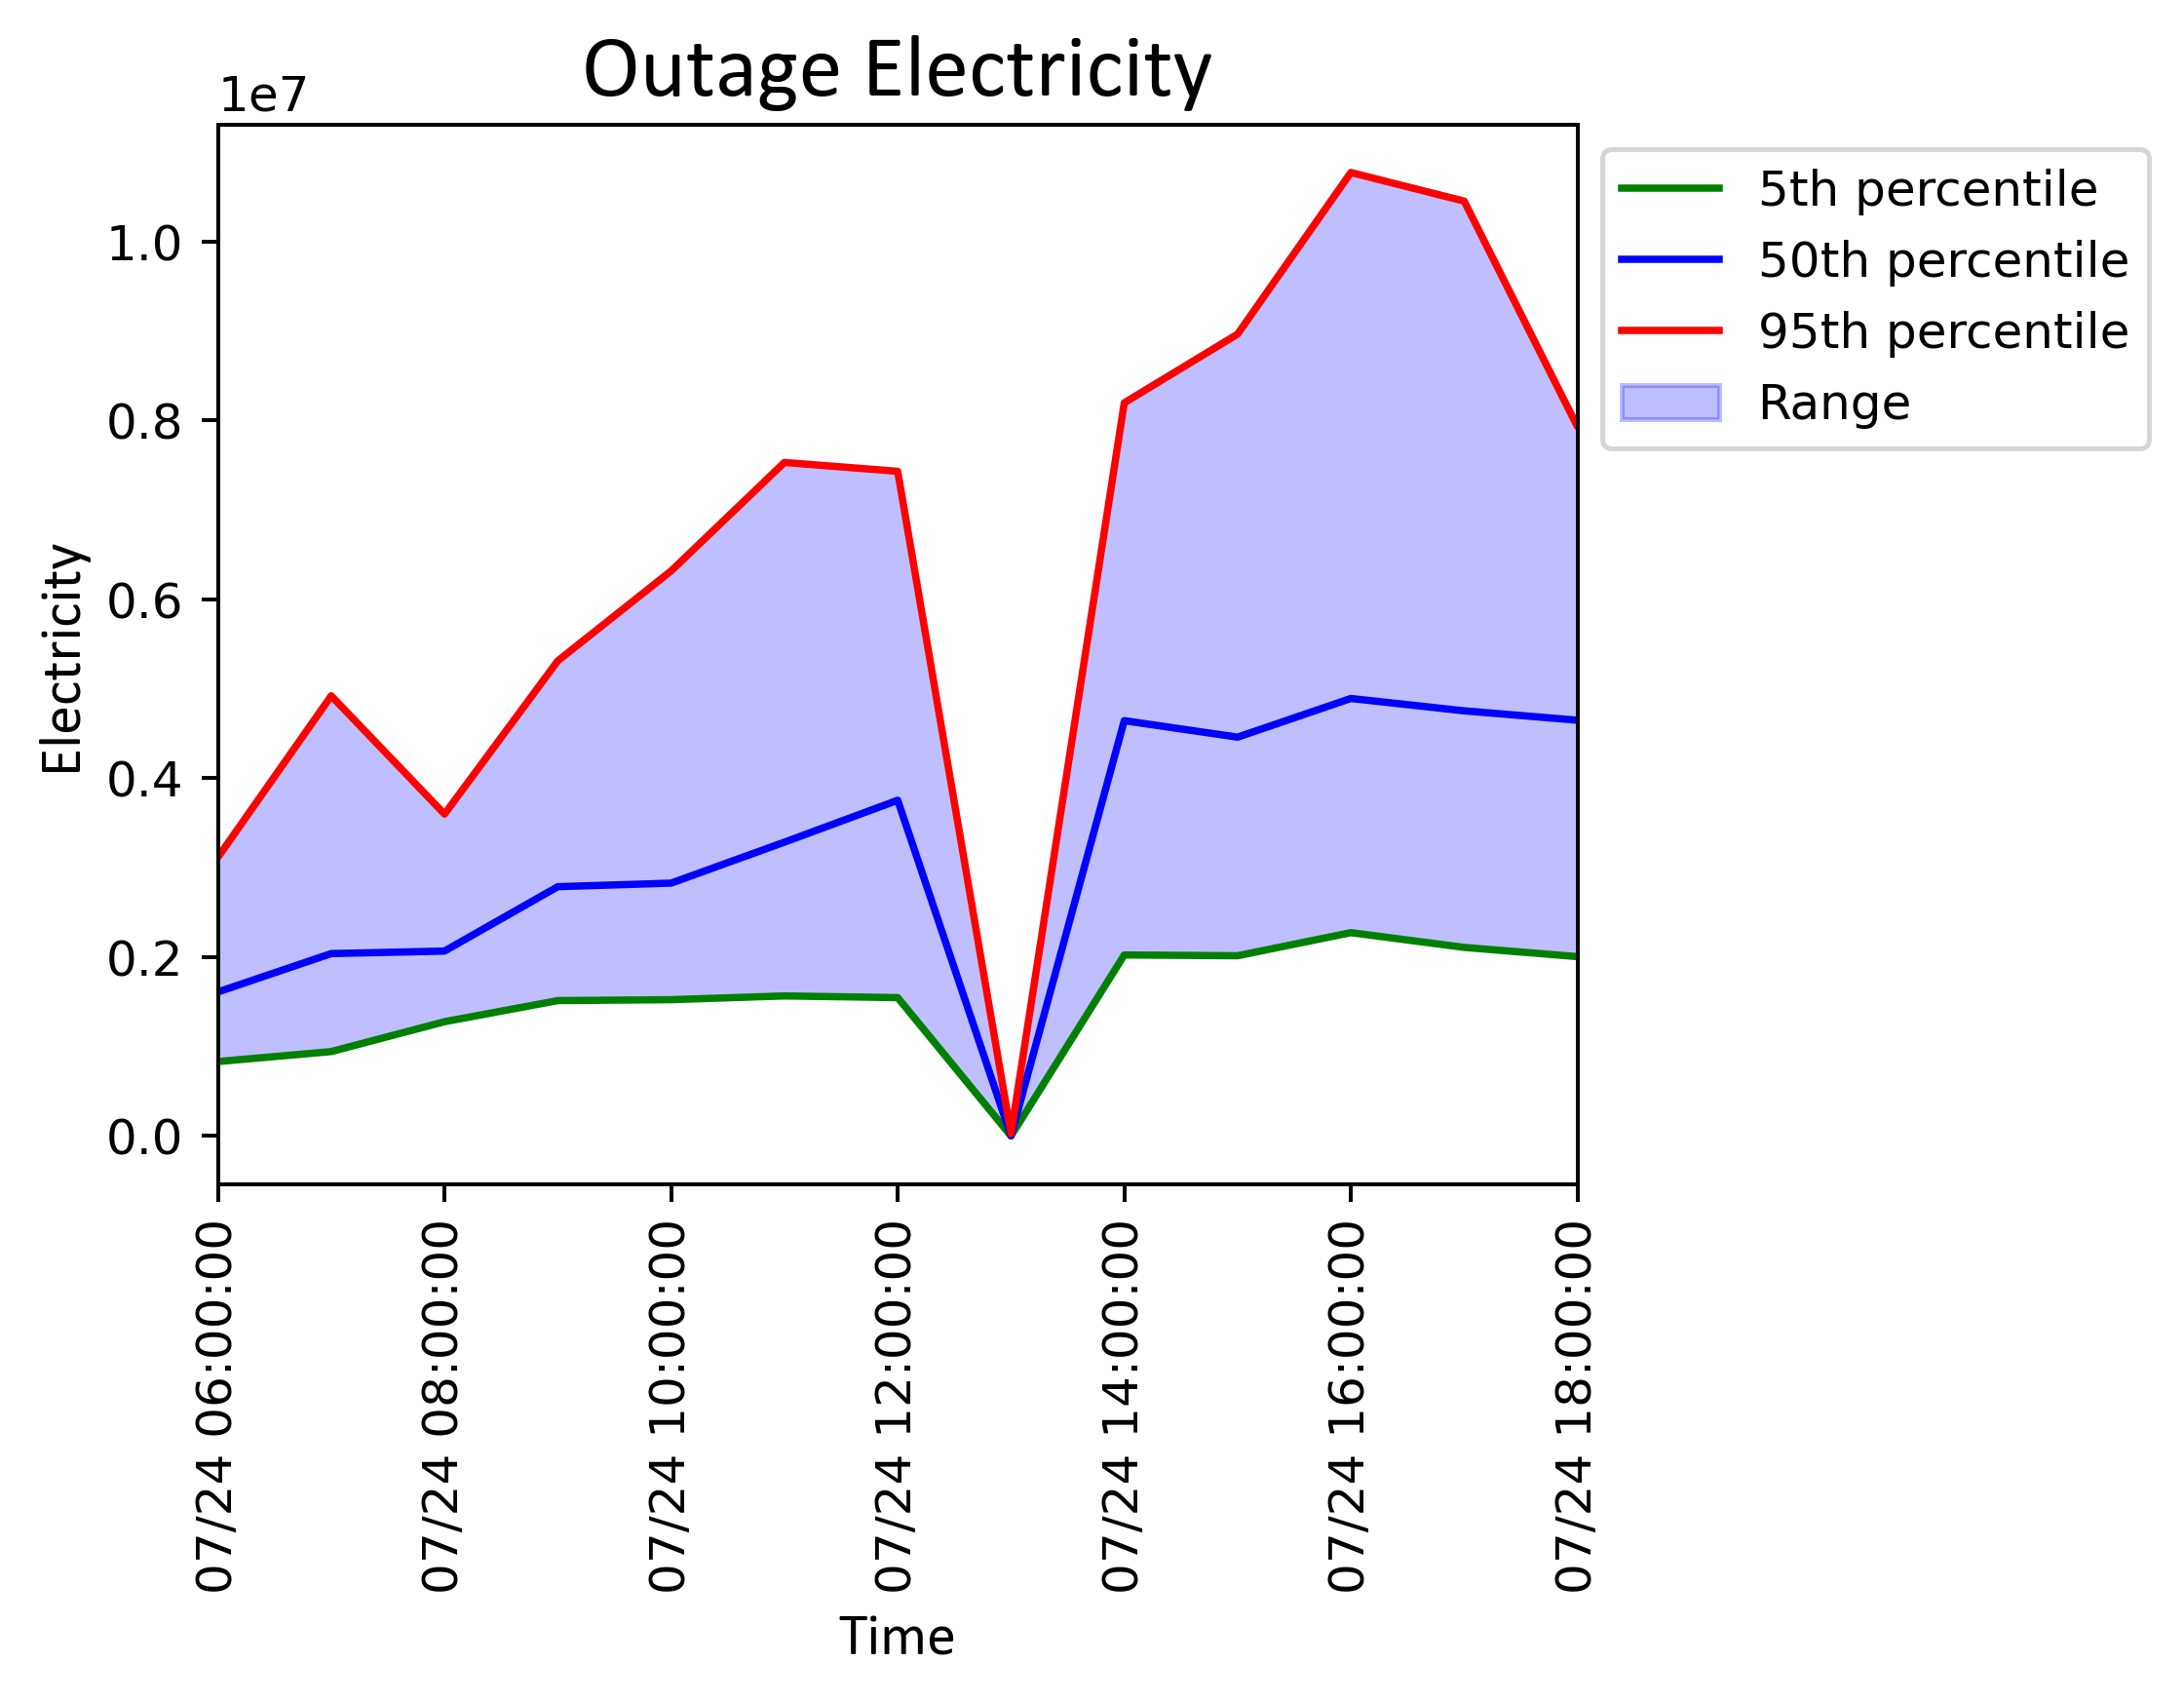

In [43]:
f9, ax9 = plt.subplots(figsize=(5,4),dpi=360)
ax9.plot(outage_summary['Date/Time'],outage_summary['E - 5%'],color='g',label="5th percentile")
ax9.plot(outage_summary['Date/Time'],outage_summary['E - 50%'],color = 'b',label="50th percentile")
ax9.plot(outage_summary['Date/Time'],outage_summary['E - 95%'],color='r',label="95th percentile")
ax9.fill_between(outage_summary['Date/Time'], outage_summary['E - 5%'], outage_summary['E - 95%'],alpha=.25,color='b',label="Range")
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='2H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax9.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax9.set_xlim(window_start,window_end)
ax9.set_xlabel('Time',fontsize=labelsize,**labelfont)
ax9.set_ylabel('Electricity',fontsize=labelsize,**labelfont)
ax9.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
ax9.set_title('Outage Electricity',fontsize=titlesize,**labelfont)

Text(0.5, 1.0, 'Outage Electricity by AC Type')

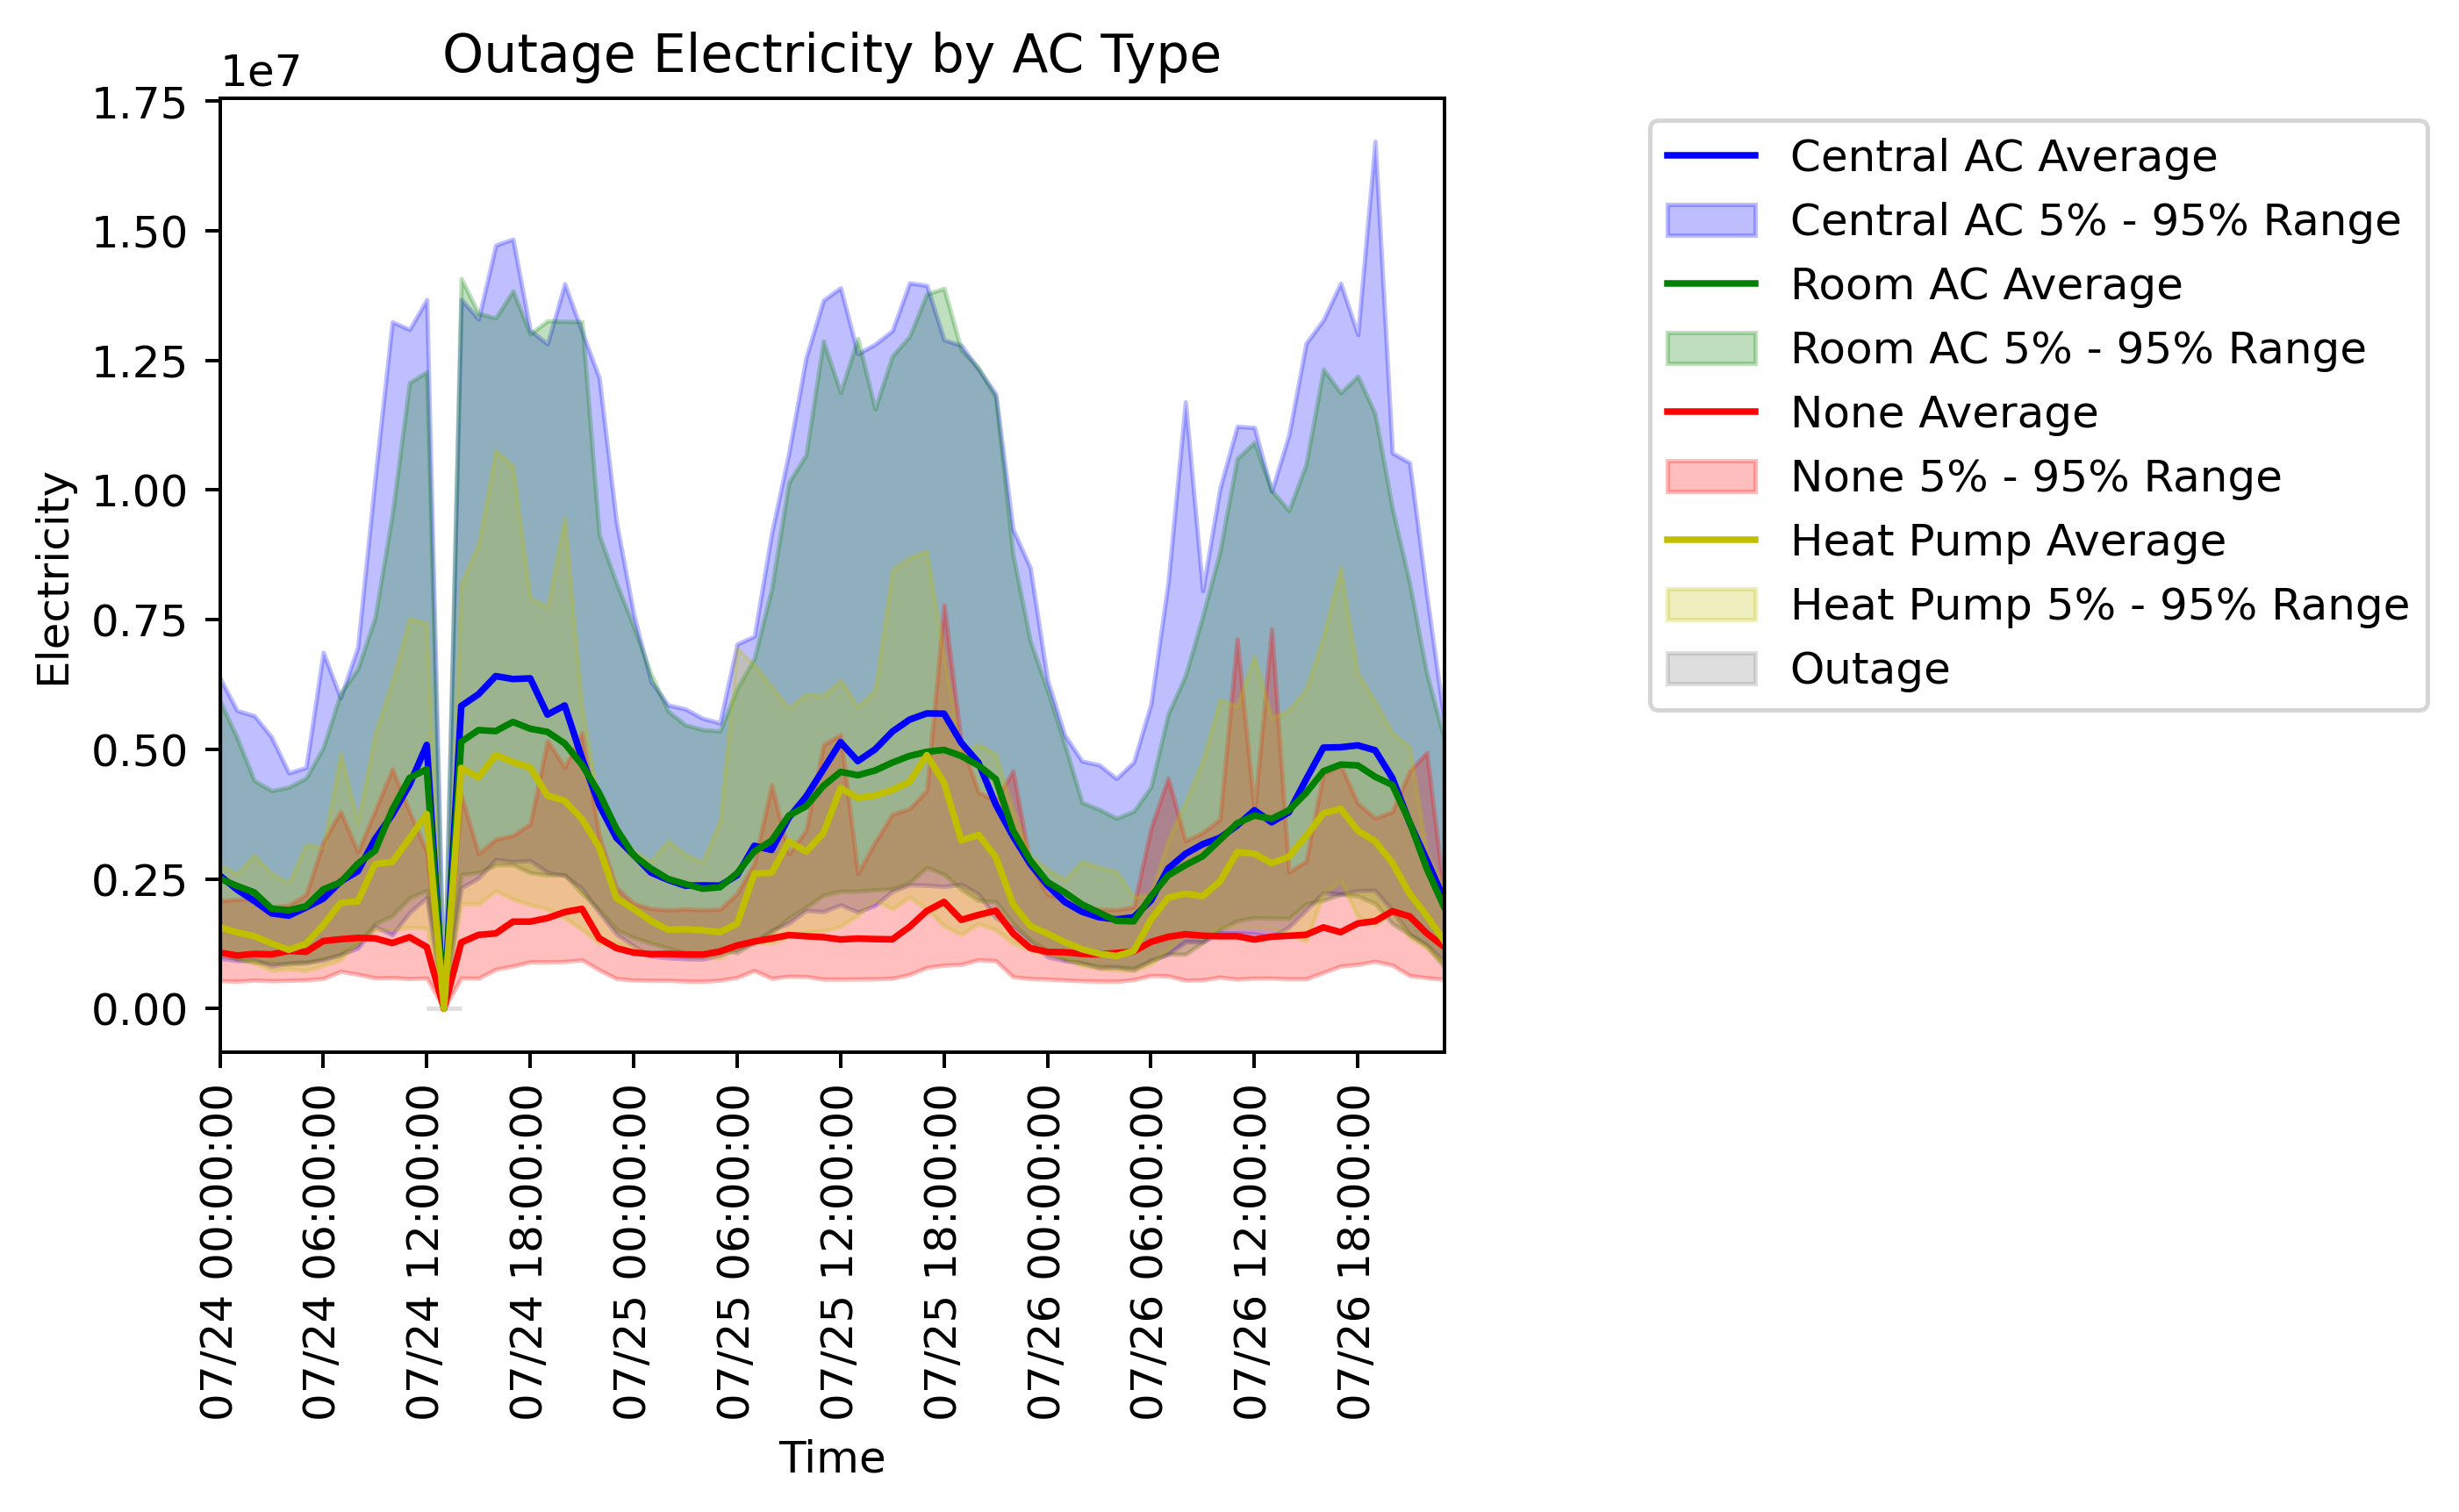

In [38]:
f5,ax5=plt.subplots(figsize=(5,4),dpi=360)
for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
    cols = 'bldg' + metadata.loc[metadata['in.hvac_cooling_type']== hvac_type]['bldg_id'].astype(str)
    subset = pd.DataFrame(outage_electricity, columns=cols)
    outage_summary[hvac_type + ' - E - 5%'] = subset.quantile(q=.05,axis=1)
    outage_summary[hvac_type + ' - E - 50%'] =subset.quantile(q=.5,axis=1)
    outage_summary[hvac_type + ' - E - 95%'] = subset.quantile(q=.95,axis=1)
    if hvac_type == 'Central AC':
        hvac_color = 'b'
    elif hvac_type == 'Room AC':
        hvac_color = 'g'
    elif hvac_type == 'None':
        hvac_color = 'r'
    else:
        hvac_color = 'y'
    ax5.plot(outage_summary['Date/Time'],outage_summary[hvac_type + ' - E - 50%'],color = hvac_color,label= str(hvac_type + " Average"))
    ax5.fill_between(outage_summary['Date/Time'], outage_summary[hvac_type + ' - E - 5%'], outage_summary[hvac_type + ' - E - 95%'],alpha=.25,color=hvac_color,label= str(hvac_type + " 5% - 95% Range"))
x_ticks = pd.date_range(start =min(outage_summary['Date/Time']), end =max(outage_summary['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax5.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax5.set_xlabel('Time')
ax5.set_ylabel('Electricity')
ax5.set_xlim(min(outage_summary['Date/Time']),max(outage_summary['Date/Time']))
ax5.fill_between([otg_start, otg_end],[y_max,y_max],alpha=.25,color='grey',label= "Outage")
ax5.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left')
ax5.set_title('Outage Electricity by AC Type')

Text(0.5, 1.0, 'Outage Electricity by AC Type')

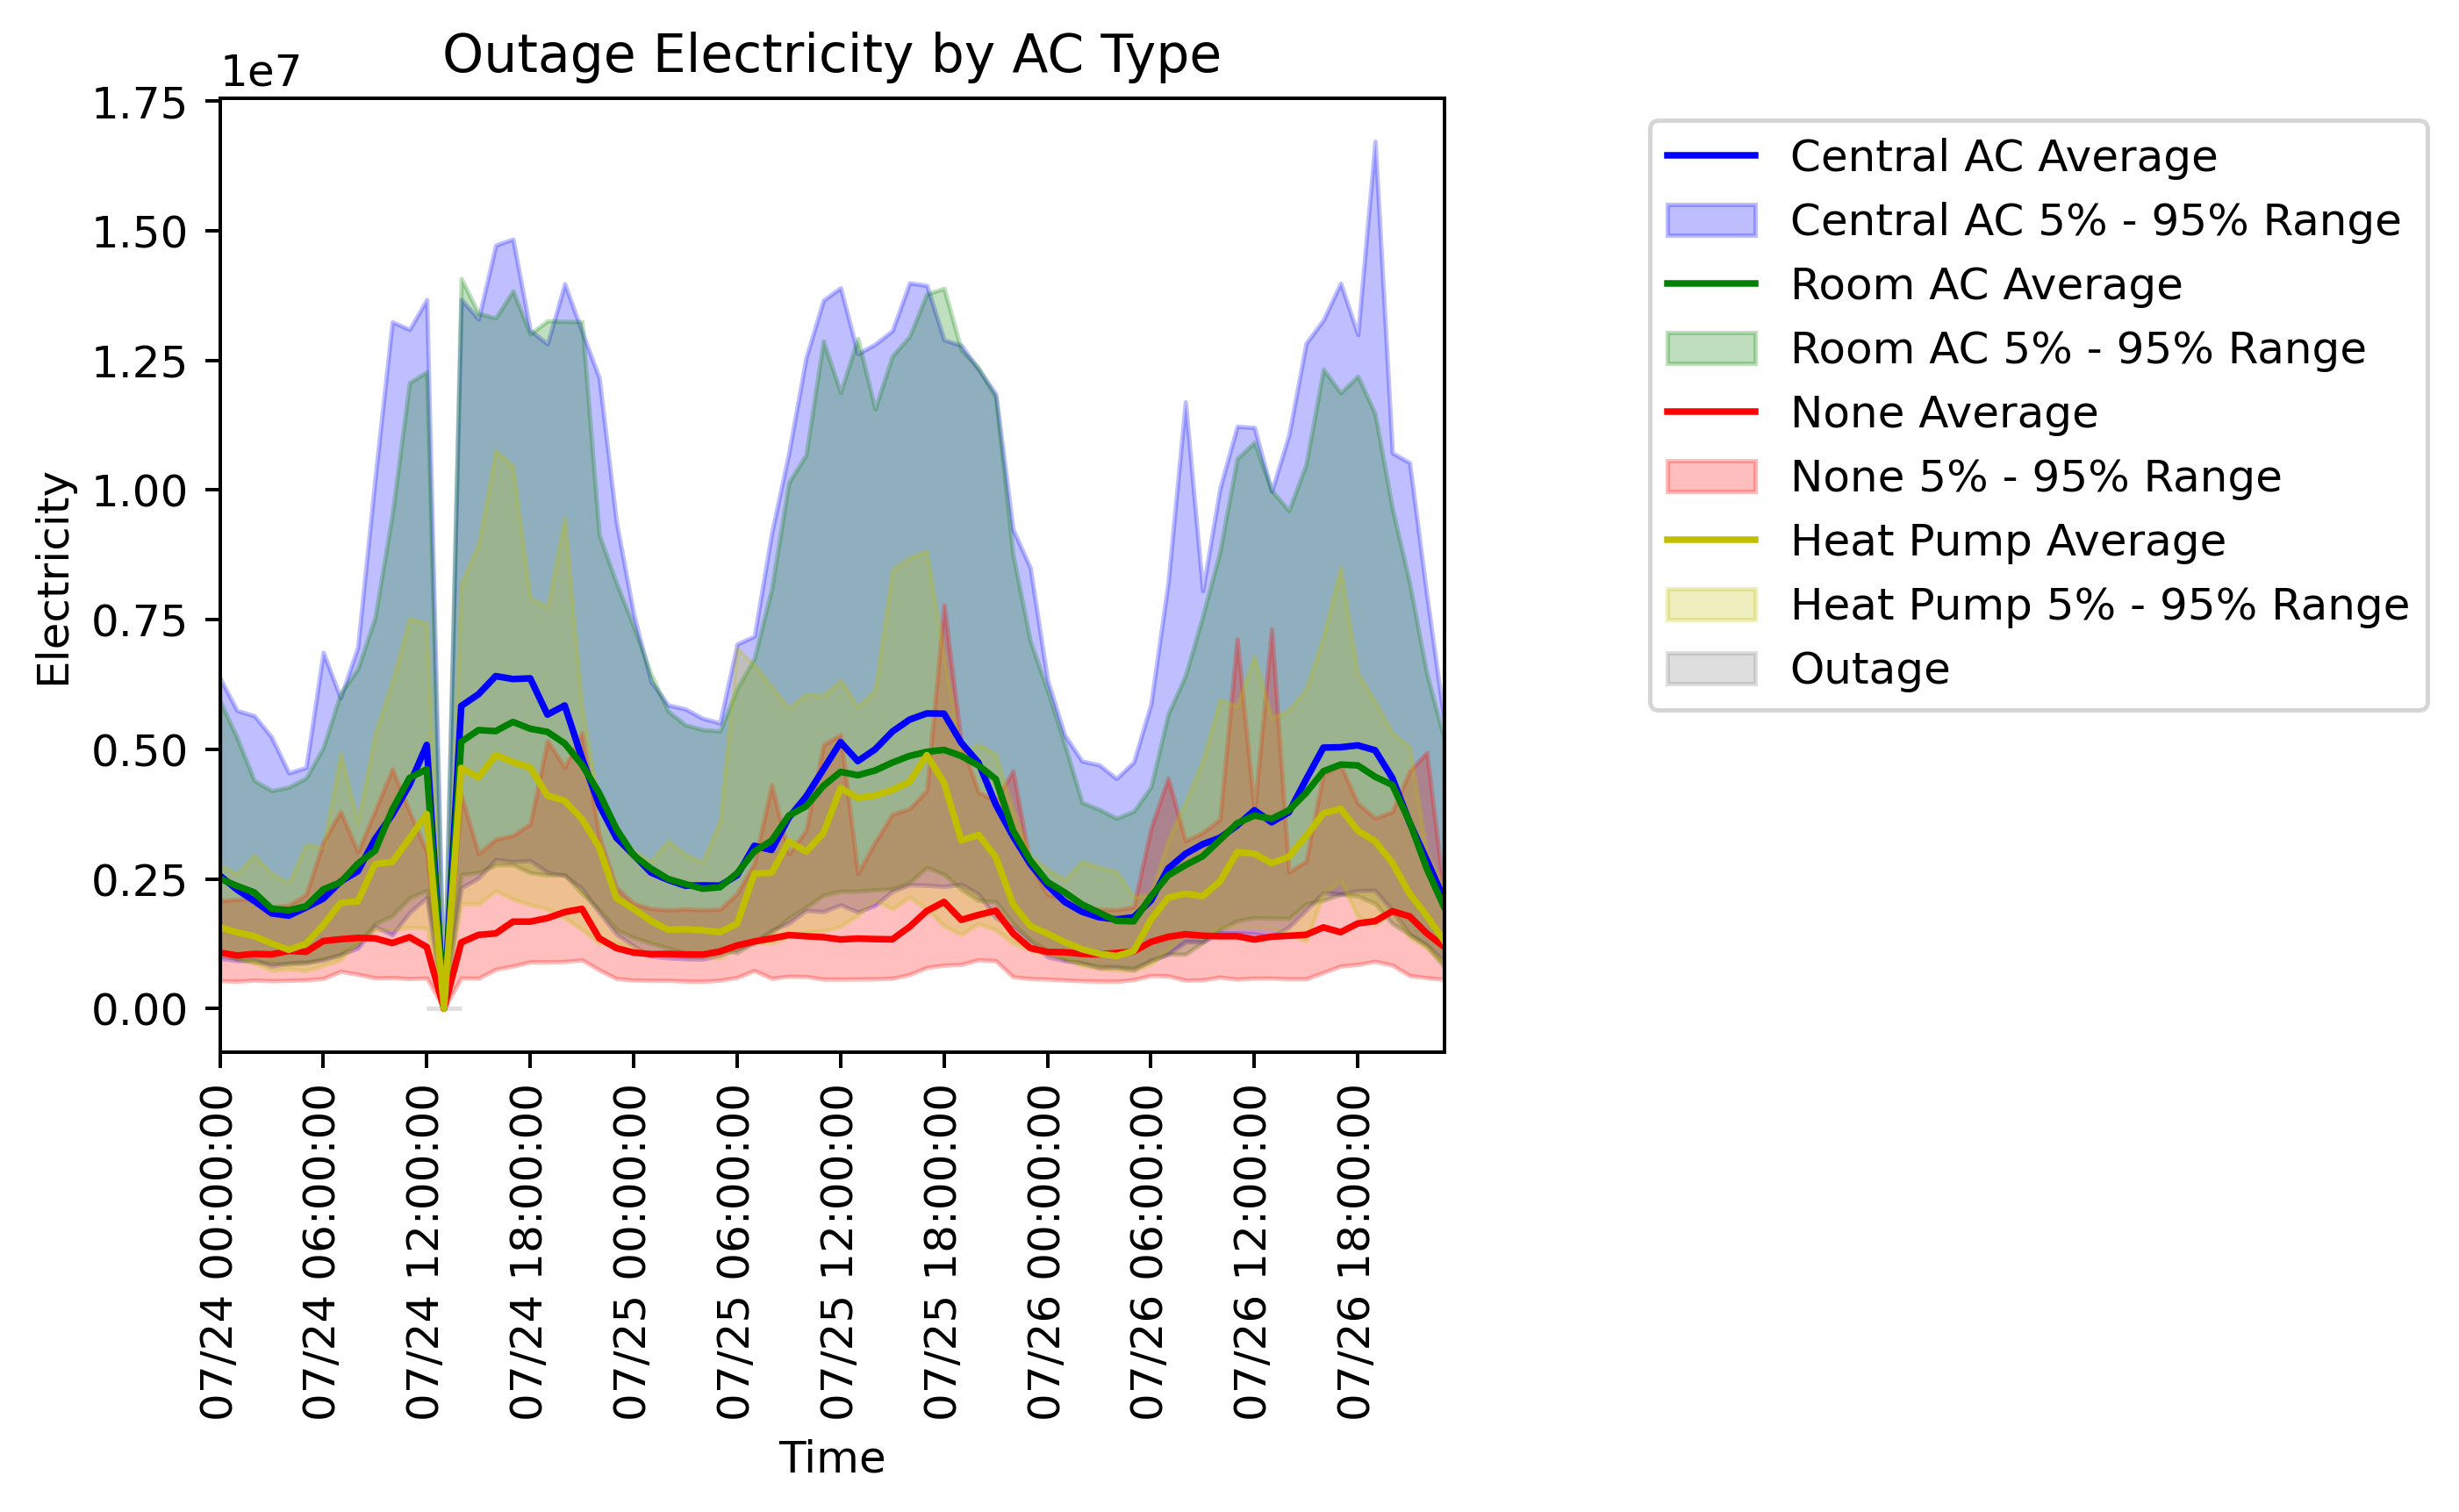

In [39]:
f5,ax5=plt.subplots(figsize=(5,4),dpi=360)
for hvac_type in pd.unique(metadata['in.hvac_cooling_type']):
    cols = 'bldg' + metadata.loc[metadata['in.hvac_cooling_type']== hvac_type]['bldg_id'].astype(str)
    subset = pd.DataFrame(outage_electricity, columns=cols)
    outage_summary[hvac_type + ' - E - 5%'] = subset.quantile(q=.05,axis=1)
    outage_summary[hvac_type + ' - E - 50%'] =subset.quantile(q=.5,axis=1)
    outage_summary[hvac_type + ' - E - 95%'] = subset.quantile(q=.95,axis=1)
    if hvac_type == 'Central AC':
        hvac_color = 'b'
    elif hvac_type == 'Room AC':
        hvac_color = 'g'
    elif hvac_type == 'None':
        hvac_color = 'r'
    else:
        hvac_color = 'y'
    ax5.plot(outage_summary['Date/Time'],outage_summary[hvac_type + ' - E - 50%'],color = hvac_color,label= str(hvac_type + " Average"))
    ax5.fill_between(outage_summary['Date/Time'], outage_summary[hvac_type + ' - E - 5%'], outage_summary[hvac_type + ' - E - 95%'],alpha=.25,color=hvac_color,label= str(hvac_type + " 5% - 95% Range"))
x_ticks = pd.date_range(start =min(outage_summary['Date/Time']), end =max(outage_summary['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax5.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax5.set_xlabel('Time')
ax5.set_ylabel('Electricity')
ax5.set_xlim(min(outage_summary['Date/Time']),max(outage_summary['Date/Time']))
ax5.fill_between([otg_start, otg_end],[y_max,y_max],alpha=.25,color='grey',label= "Outage")
ax5.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left')
ax5.set_title('Outage Electricity by AC Type')

# Gas

Text(0.5, 1.0, 'Gas')

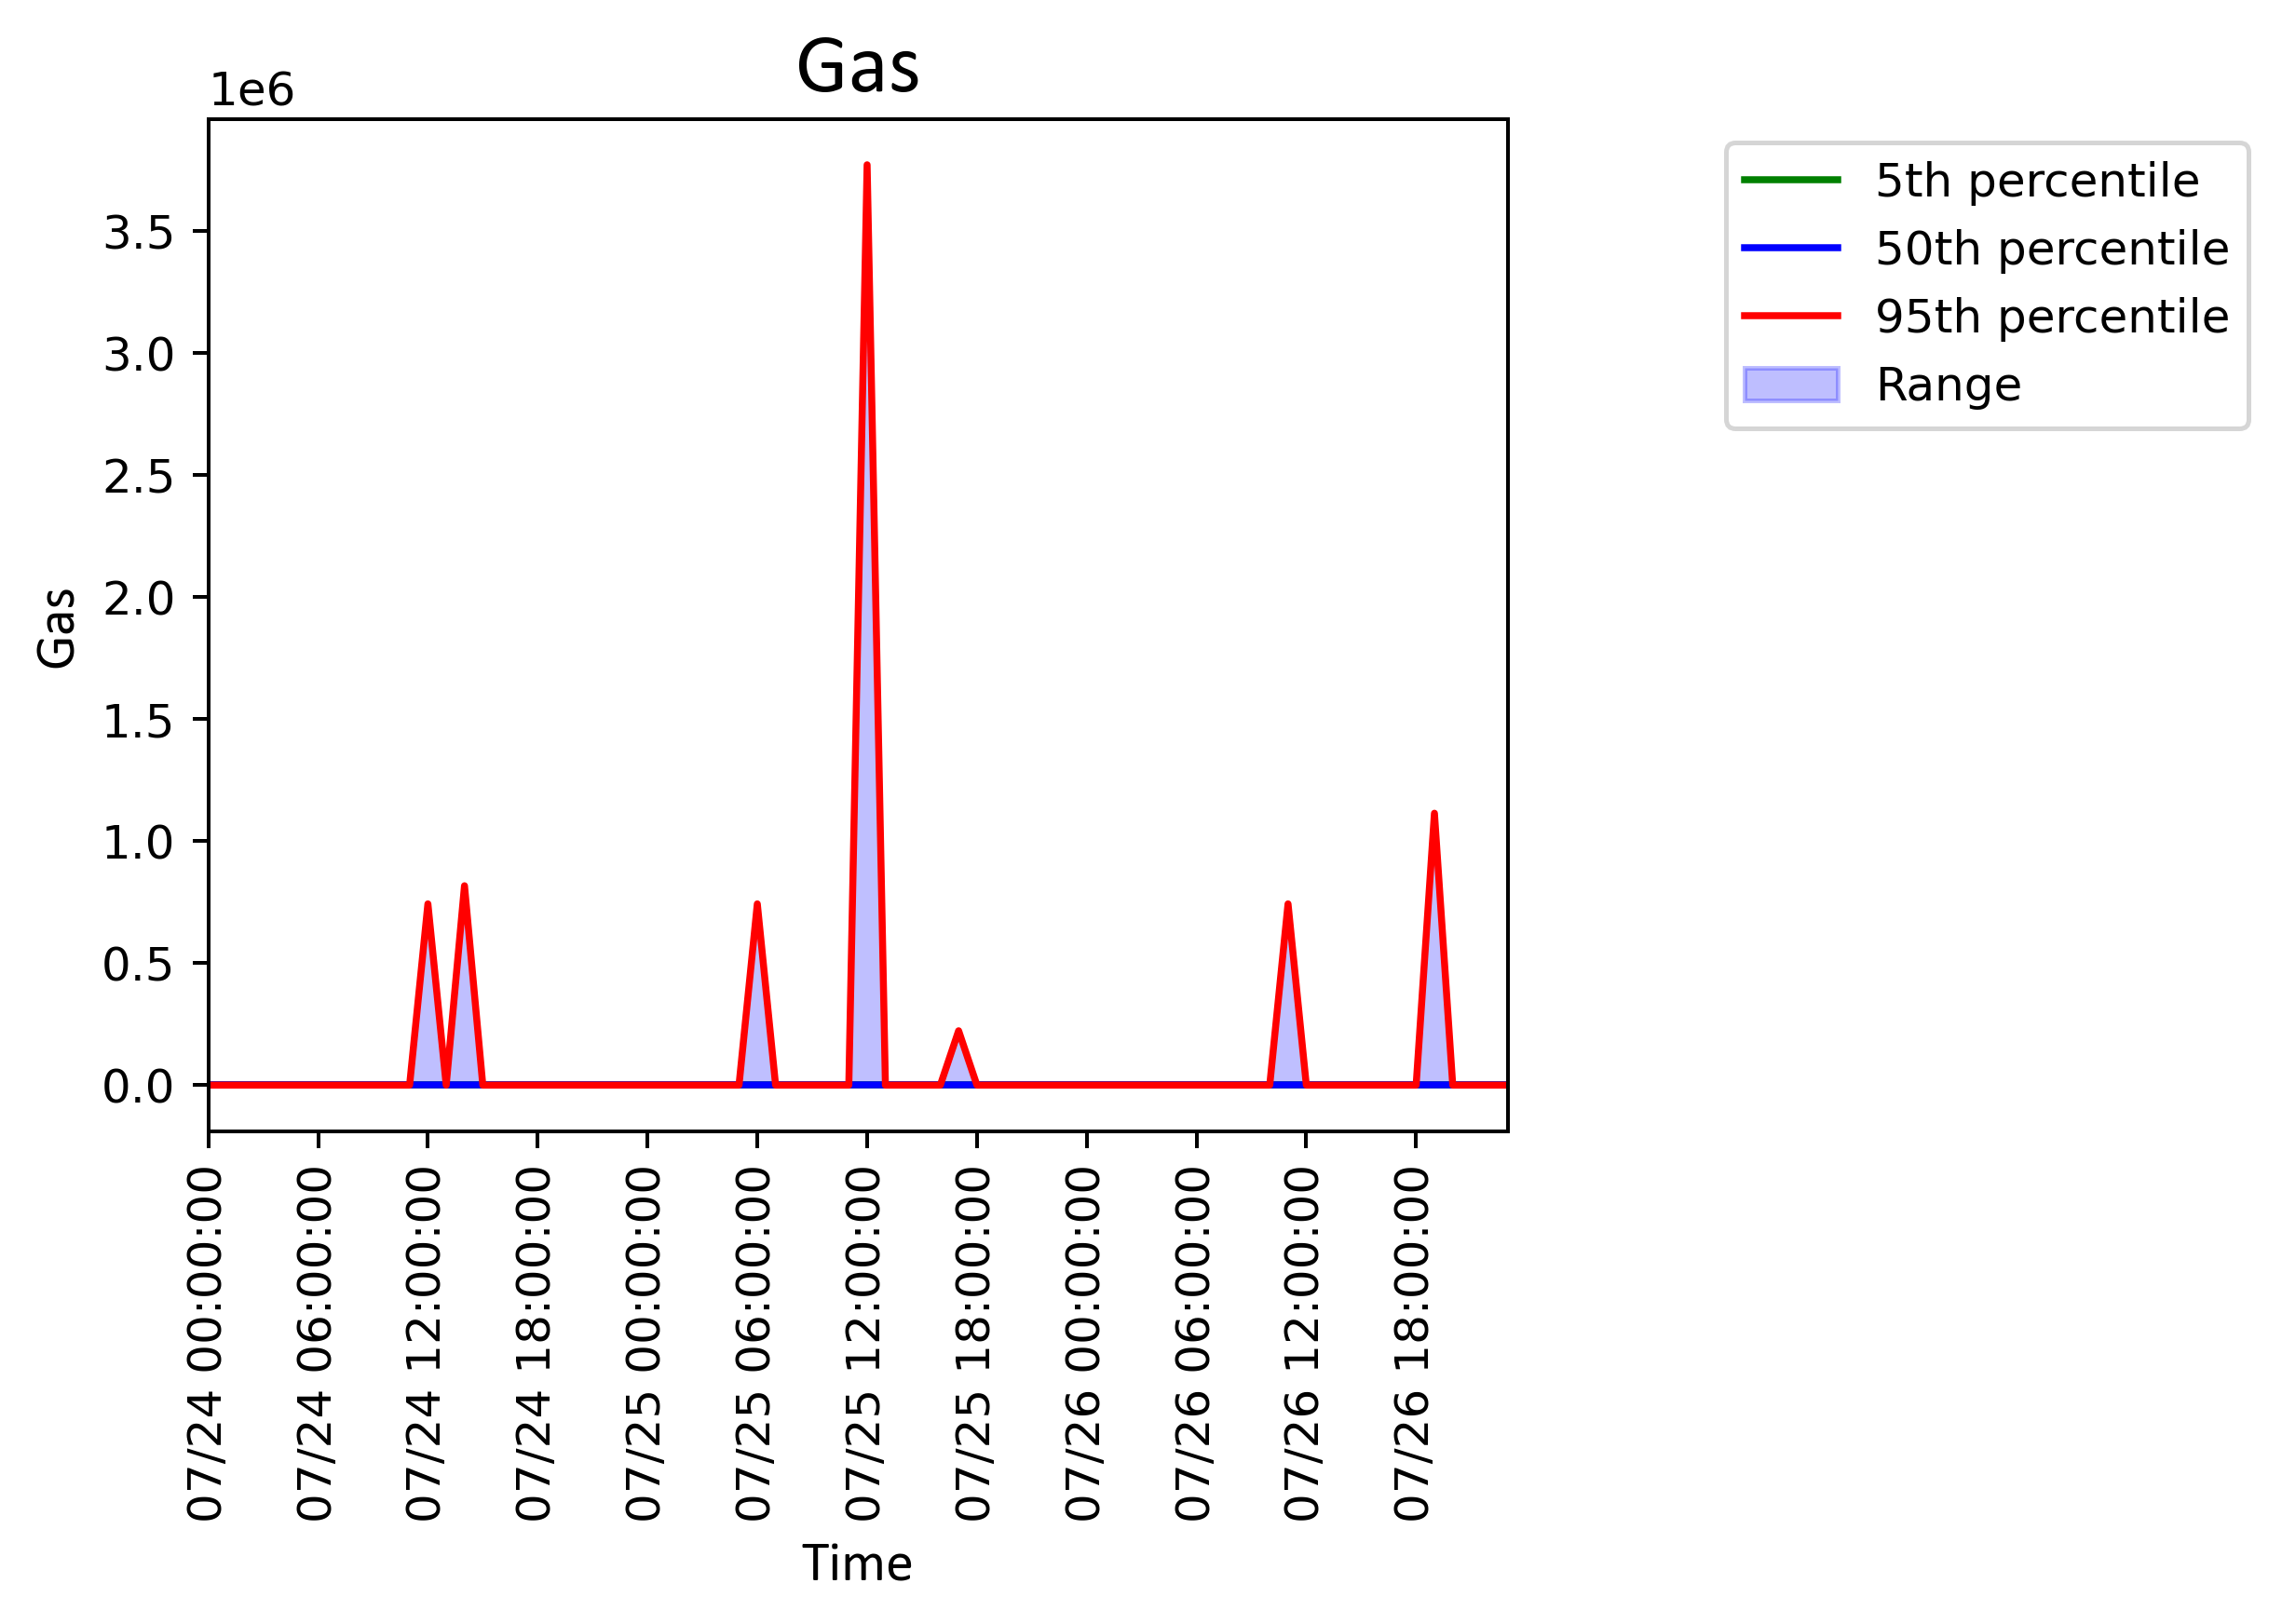

In [46]:
f9, ax9 = plt.subplots(figsize=(5,4),dpi=360)
subset = pd.DataFrame(outage_gas, columns=cols)
outage_summary['G - 5%'] = subset.quantile(q=.05,axis=1)
outage_summary['G - 50%'] =subset.quantile(q=.5,axis=1)
outage_summary['G - 95%'] = subset.quantile(q=.95,axis=1)
ax9.plot(outage_summary['Date/Time'],outage_summary['G - 5%'],color='g',label="5th percentile")
ax9.plot(outage_summary['Date/Time'],outage_summary['G - 50%'],color = 'b',label="50th percentile")
ax9.plot(outage_summary['Date/Time'],outage_summary['G - 95%'],color='r',label="95th percentile")
ax9.fill_between(outage_summary['Date/Time'], outage_summary['G - 5%'], outage_summary['G - 95%'],alpha=.25,color='b',label="Range")
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='6H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax9.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax9.set_xlim(min(outage_summary['Date/Time']),max(outage_summary['Date/Time']))
ax9.set_xlabel('Time',fontsize=labelsize,**labelfont)
ax9.set_ylabel('Gas',fontsize=labelsize,**labelfont)
ax9.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left')
ax9.set_title('Gas',fontsize=titlesize,**labelfont)

Text(0.5, 1.0, 'Outage Gas')

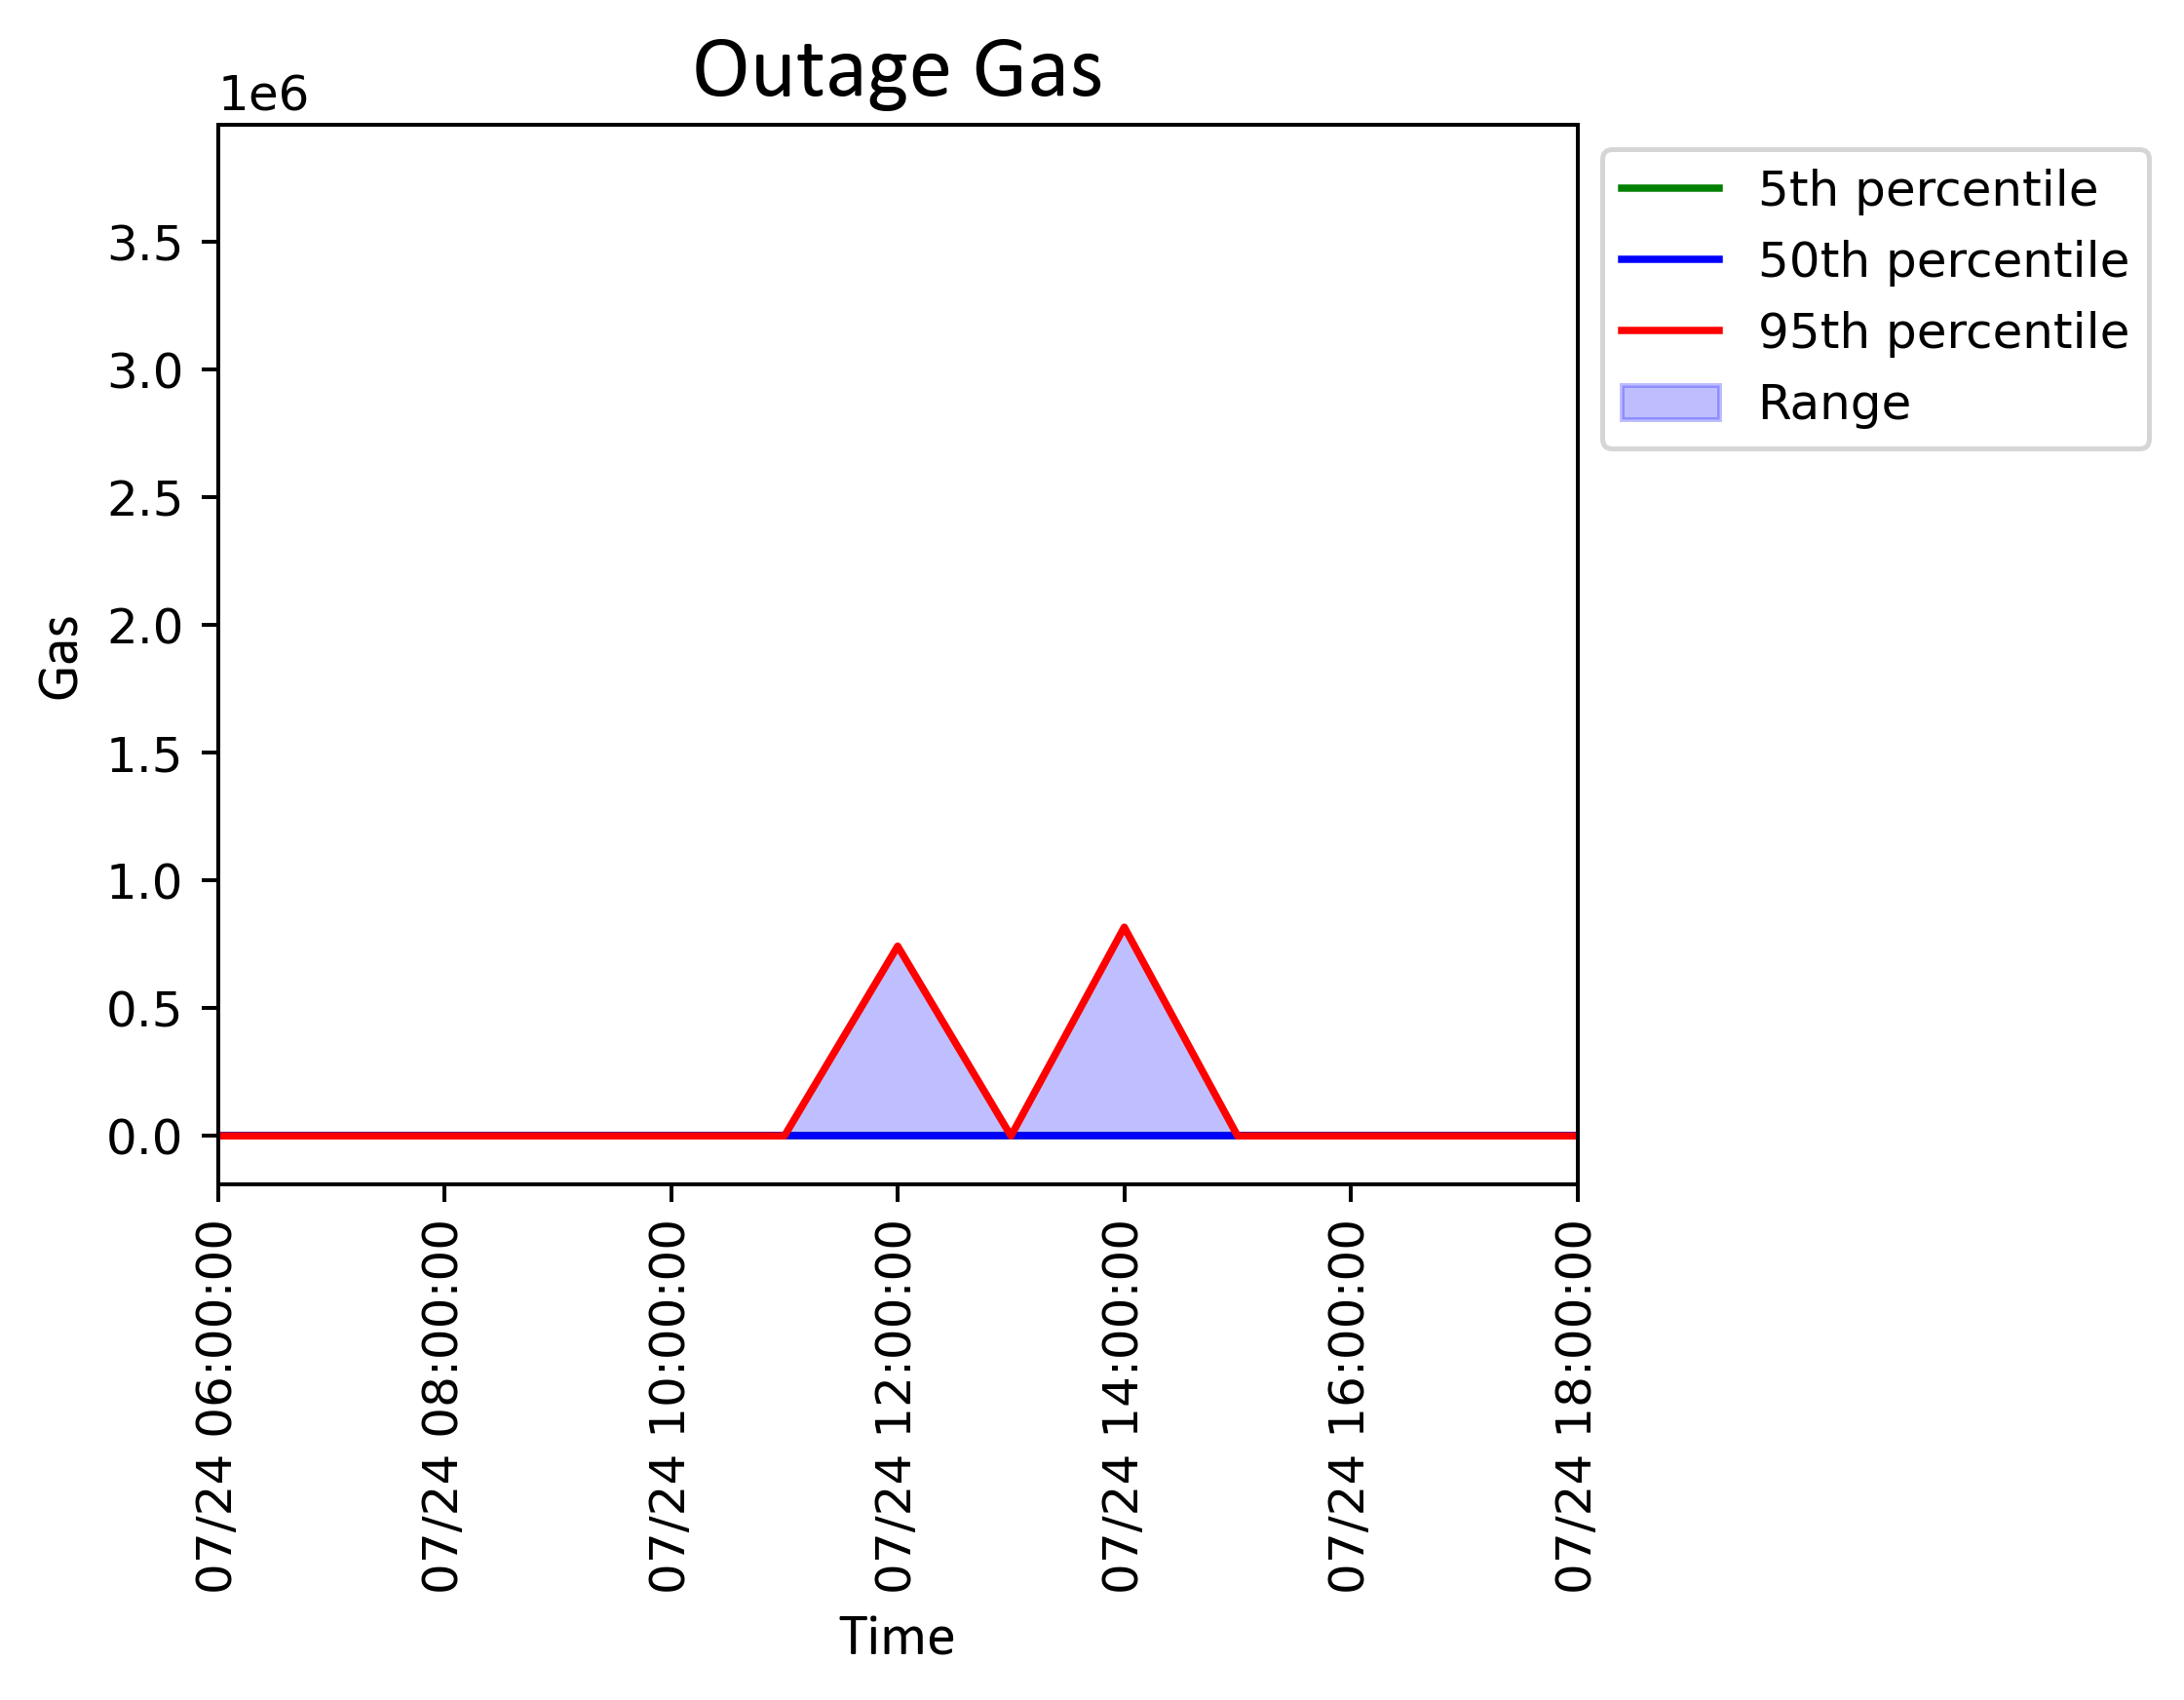

In [47]:
f9, ax9 = plt.subplots(figsize=(5,4),dpi=360)
ax9.plot(outage_summary['Date/Time'],outage_summary['G - 5%'],color='g',label="5th percentile")
ax9.plot(outage_summary['Date/Time'],outage_summary['G - 50%'],color = 'b',label="50th percentile")
ax9.plot(outage_summary['Date/Time'],outage_summary['G - 95%'],color='r',label="95th percentile")
ax9.fill_between(outage_summary['Date/Time'], outage_summary['G - 5%'], outage_summary['G - 95%'],alpha=.25,color='b',label="Range")
x_ticks = pd.date_range(start =min(baseline_temperature['Date/Time']), end =max(baseline_temperature['Date/Time']),freq ='2H')
x_tick_labels = x_ticks.strftime('%m/%d %H:%M:%S')
ax9.set_xticks(x_ticks,x_tick_labels,rotation=90)
ax9.set_xlim(window_start,window_end)
ax9.set_xlabel('Time',fontsize=labelsize,**labelfont)
ax9.set_ylabel('Gas',fontsize=labelsize,**labelfont)
ax9.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
ax9.set_title('Outage Gas',fontsize=titlesize,**labelfont)

In [ ]:
# Outages ! 